<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Reducción de Dimesionalidad </p> PCA </p> Análisis de Componentes Principales </p>    </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Diplomado Ciencia de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Curso 2025-1</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

In [ ]:
%%html
<center><marquee style='width: 60%; color: red'><b>✌ ¡Hola a todos y a todas! Un saludo... Bienvenidos a la clase de PCA✌ </b></marquee><center>

# <FONT SIZE=5 COLOR="purple"> 1. Análisis Exploratorio Multivariado </FONT>

En esta sesión revisaremos algunos elementos fundamentales de análisis exploratorio multivariado como:

- Tablas de contingencias

- Diagramas de dispersión

- Gráficas de regresión

Por otro lado, revisaremos los conceptos y aplicación del análisis de componentes principales.


Primero cargaremos las librerías necesarias para el trabajo en este notebook

In [ ]:
#para importar la librería pandas.
import pandas as pd
import numpy as np

# librerías para gráficar
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# estandarizar los datos
from sklearn.preprocessing import StandardScaler

Vamos a trabajar con los datos denominados APARTAMENTOS, que contiene la información de apartamentos de la ciudad de Medellín: ubicación, precio, mt2, número de alcobas, etc.

In [ ]:
# importamos los datos
aptos = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/APARTAMENTOS.csv")

In [ ]:
# revisamos la cabeza de los datos
aptos.head(7)

,Unnamed: 0,precio,mt2,ubicacion,estrato,alcobas,banos,balcon,parqueadero,administracion,avaluo,terminado
0,1,79.0,43.16,norte,3,3,1,si,si,0.050,14.923002,no
1,2,93.0,56.92,norte,2,2,1,si,si,0.069,27.000000,si
2,3,100.0,66.40,norte,3,2,2,no,no,0.000,15.738427,no
3,4,123.0,61.85,norte,2,3,2,si,si,0.130,27.000000,no
4,5,135.0,89.80,norte,4,3,2,si,no,0.000,39.567000,si
5,6,140.0,71.00,norte,3,3,2,no,si,0.120,31.145508,si
6,7,145.0,54.83,norte,3,2,2,si,si,0.140,27.000000,si


# <FONT SIZE=5 COLOR="green"> 1.1 Tablas de Contingencia </FONT>

- Una tabla de contingencia o tabla de frecuencuas cruzadas es una herramienta que nos permite analizar la relación entre dos o más variables categóricas.

Para trabajar en Python una tabla cruzada

$$pd.crosstab(datos[``variable1"], datos[``variable1"])$$

Vamos a hacer la tabla cruzada de las variables : *ubicacion* y *alcobas*

In [ ]:
# tabla cruzada de ubicación con alcobas
pd.crosstab(aptos.ubicacion, aptos.alcobas)

alcobas,1,2,3,4,5,14
ubicacion,,,,,,
aburra sur,6,37,119,6,1,0
belen guayabal,0,6,49,11,1,0
centro,3,10,20,3,1,1
laureles,0,9,54,10,0,0
norte,0,3,6,1,0,0
occidente,0,17,44,8,0,0
poblado,6,46,181,30,5,0


También podemos cruzar más de dos variables

In [ ]:
# cruzar: ubicación balcon y terminado
pd.crosstab([aptos.ubicacion, aptos.balcon], aptos.terminado)

terminado              no   si
ubicacion      balcon         
aburra sur     no       9   29
               si       9  122
belen guayabal no       1   11
               si       7   48
centro         no       9    9
               si       5   15
laureles       no       3   22
               si       2   46
norte          no       1    1
               si       2    6
occidente      no       3   25
               si      10   31
poblado        no      11   51
               si      30  176

# <FONT SIZE=5 COLOR="green"> 1.2 Covarianza y Correlación </FONT>

***La Covarianza***

La covarianza es el valor que refleja en que medida dos variables aleatorias varian de forma conjunta respecto a sus medias.

De acuerdo con lo anterior, la covarianza está dada por la siguiente fórmula

$$Muestra: Cov(X,Y)=S_{xy}=\dfrac{\sum \limits_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})}{n-1}$$

$$Poblacion:COV(X,Y)=\sigma_{XY}=\dfrac{\sum \limits_{i=1}^N (x_i-\mu_x)(y_i-\mu_y)}{N}$$

donde $\overline{x}$ y $\overline{y}$ son las medias de las variables $X$ y $Y$ respectivamente y $n$ es el total de observaciones.

A continuación listaremos algunas propiedades de la covarianza

- $Cov(X,c)=0$, donde $c$ es una constante.

- $Cov(X,X)=Var(X)$, la covarianza de una variable con si misma es la varianza de la variable.

- $Cov(X,Y)=C(Y,X)$, la varianza es simétrica, es decir, no importa el orden en que se coloquen la variables.

- La covarianza mide la fuerza de la relación lineal entre dos variables.

- Una alta covarianza no implica efecto causal.

**Interpretación de la covarianza**

- $Cov(X,Y)>0$ ; las variables $X$ y $Y$ tienden a moverse en la misma dirección.

- $Cov(X,Y)<0$   las variables $X$ y $Y$ tienden a moverse en direcciones opuestas.

- $Cov(X,Y)=0$: las variables $X$ y $Y$ no estan relacionadas linealmente.

***El coeficiente de correlación***

El coeficiente de correlación se define como

$$muestra: r_{xy}=\dfrac{S_{xy}}{S_xS_y} \qquad \qquad poblacion : \rho_{xy}=\dfrac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

lo que es equivalente a

$$r_{xy}=\dfrac{\sum \limits_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})}{\left (\sum \limits_{i=1}^n (x_i-\overline{x})^2 \right)^{1/2} \left ( \sum \limits_{i=1}^n (y_i-\overline{y})^2 \right)^{1/2}}$$

Veamos la interpretación de los diferentes valores del coeficiente de correlación de Pearson, teniendo en cuenta que:

$$-1 \leq r_{xy} \leq 1 $$

<FONT SIZE=3 COLOR="purple"> ***Punto para caso final: demostrar la desigualdad anterior*** </FONT>


- Si $r_{xy}=1$, hay una relación positiva perfecta, es decir, indica una dependencia total entre las variables de manera directa. Si una de ellas aumenta, la otra también lo hace en proporción constante. Es decir, la relación es lineal.

- Si $0<r_{x,y}<1$, existe una correlación positiva.

- Si $r_{x,y}=0$, no existe relación lineal. Pero pueden haber otro tipo de relaciones.

- Si $-1<r_{x,y}<0$, existe una correlación negativa.

- Si $r_{x,y}=-1$, existe una correlación negativa perfecta, es decir, indica una dependencia total de manera inversa. Si una variable disminuye la otra aumenta en proporción constante.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/pearson.png?raw=true" alt="centered image" width="550" height="300"></center>
<br>

Algunas propiedades para tener en cuenta del coeficiente de correlación:

- No depende de las unidades de las variables.

- El coefiente de Pearson es acotado


Veamos algunos ejemplos de cálculo con otro conjunto de datos denominado diabetes

In [ ]:
# cargamos el conjunto de datos diabetes
diabetes = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/diabetes.csv")

In [ ]:
# veamos la información del conjunto de datos
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Ahora, calculamos la matriz de covarianza

In [ ]:
# Matriz de covarianza variables numéricas
covarianza=diabetes.cov(numeric_only= True) ; round(covarianza,2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.35,13.95,9.21,-4.39,-28.56,0.47,-0.04,21.57,0.36
Glucose,13.95,1022.25,94.43,29.24,1220.94,55.73,1.45,99.08,7.12
BloodPressure,9.21,94.43,374.65,64.03,198.38,43.00,0.26,54.52,0.60
SkinThickness,-4.39,29.24,64.03,254.47,802.98,49.37,0.97,-21.38,0.57
Insulin,-28.56,1220.94,198.38,802.98,13281.18,179.78,7.07,-57.14,7.18
BMI,0.47,55.73,43.00,49.37,179.78,62.16,0.37,3.36,1.10
DiabetesPedigreeFunction,-0.04,1.45,0.26,0.97,7.07,0.37,0.11,0.13,0.03
Age,21.57,99.08,54.52,-21.38,-57.14,3.36,0.13,138.30,1.34
Outcome,0.36,7.12,0.60,0.57,7.18,1.10,0.03,1.34,0.23


Vamos a calcular la matriz de correlación

In [ ]:
# matriz de correlación
corr = diabetes.corr() ; corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Vamos algunos gráficos de la correlación de las variables. Iniciaremos con el gráfico de dispersión de dos variables y luego de múltiples variables.

In [ ]:
# gráfico de dispersión del conjunto de datos apartamentos y las variables precio y metro cuadrado
px.scatter(aptos,
           x = "precio",
           y = "mt2")

Ahora un gráfico de dispersión múltiple

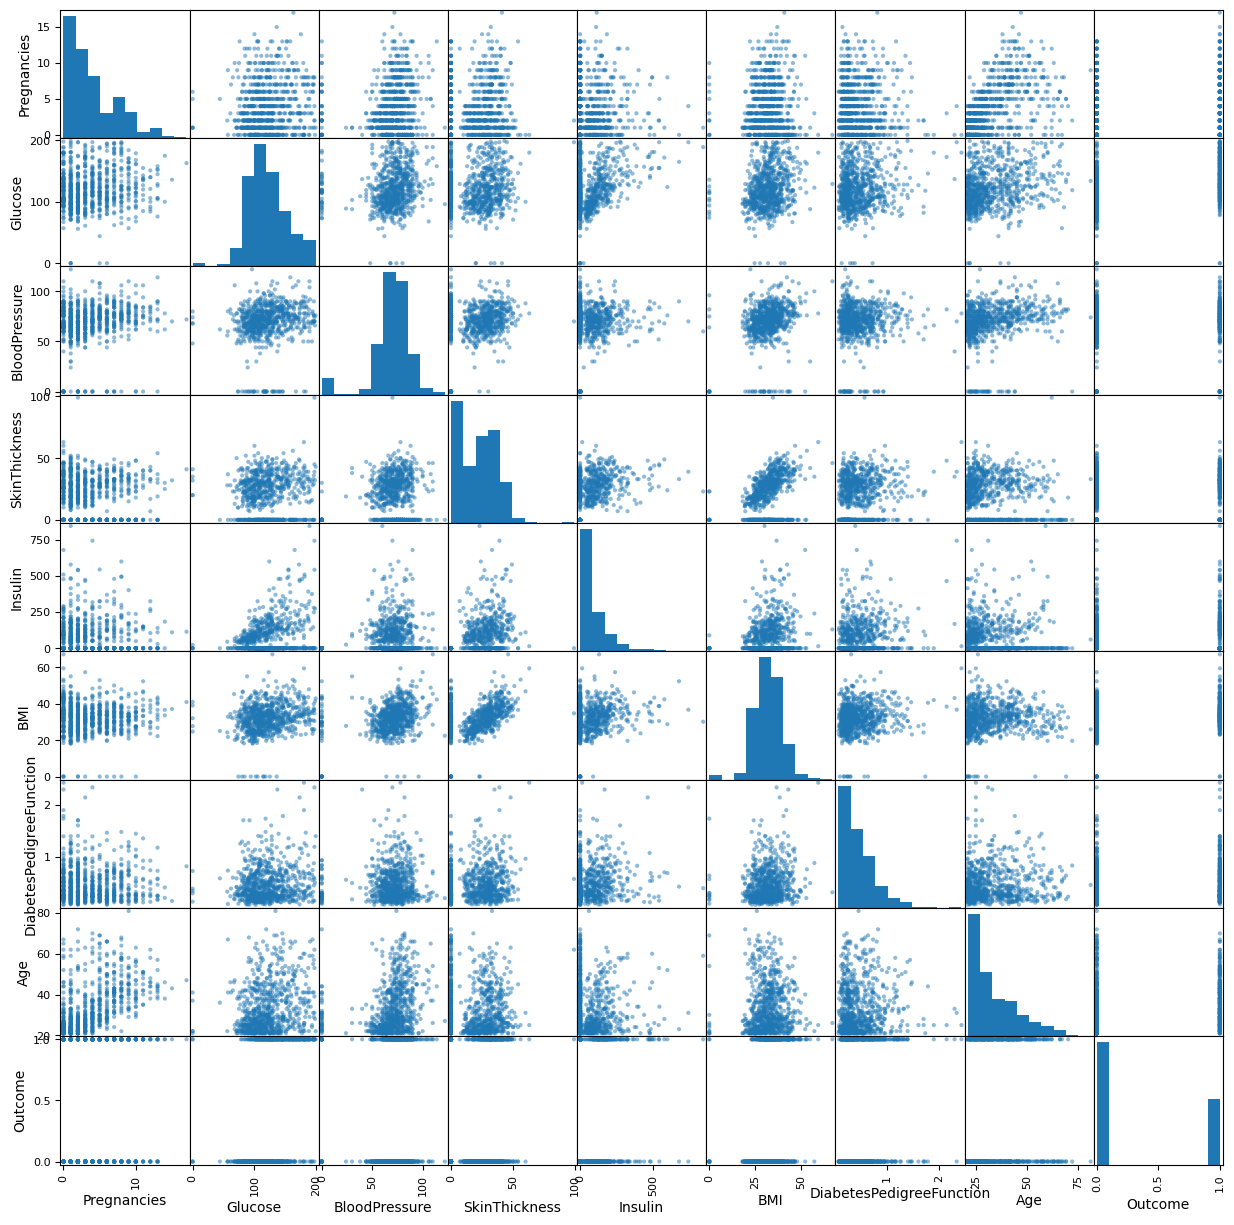

In [ ]:
# gráficos de correlación múltiple entre variables cuantitativas
pd.plotting.scatter_matrix(diabetes,
                           figsize=(15, 15))
plt.show()

Finalmente podemos hacer un mapa de calor con las correlaciones

<Axes: >

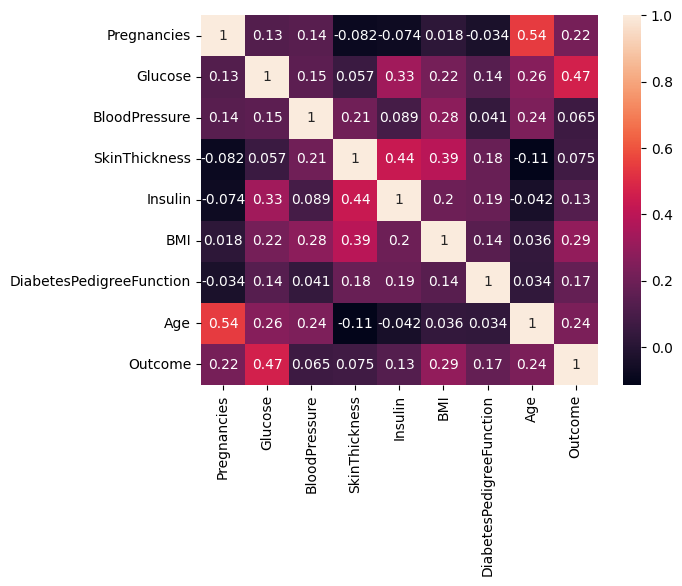

In [ ]:
# mapa de calor de la correlación con valores
sns.heatmap(corr, annot=True)

**Ejercicio de tabla de contingencia**

In [ ]:
datos1=pd.read_csv("https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/ICFES/PruebaSaber1.csv", sep=";", encoding="latin1")
datos1.head()

<ipython-input-14-3cb2031c4c7d>:1: DtypeWarning:

Columns (9,57,69) have mixed types. Specify dtype option on import or set low_memory=False.



,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,ESTU_ESTADOCIVIL,ESTU_TITULOOBTENIDOBACHILLER,ESTU_ANO_EXAMENESTADO_SB11,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_INGLES_PGREF,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PGREF,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL
0,COLOMBIA,F,22/06/1991,ESTUDIANTE,COLOMBIA,VALLE,CALI,Soltero,Bachiller acadmico,2009.0,...,-A1,17,27.0,104.0,3.0,53.0,61.0,94,36,44.584435
1,COLOMBIA,M,03/11/1994,ESTUDIANTE,COLOMBIA,LA GUAJIRA,FONSECA,Soltero,Bachiller tcnico,2012.0,...,A2,64,63.0,113.0,3.0,73.0,75.0,94,36,30.799276
2,COLOMBIA,F,03/11/1995,ESTUDIANTE,COLOMBIA,HUILA,NEIVA,Soltero,Bachiller acadmico,2012.0,...,A1,43,44.0,118.0,3.0,82.0,80.0,101,55,48.733856
3,COLOMBIA,F,20/11/1995,ESTUDIANTE,COLOMBIA,CAUCA,POPAYµN,Soltero,Bachiller acadmico,2012.0,...,A2,72,74.0,120.0,3.0,84.0,83.0,118,89,37.267822
4,COLOMBIA,M,28/08/1995,ESTUDIANTE,COLOMBIA,ATLANTICO,SOLEDAD,Soltero,Bachiller tcnico,2011.0,...,B1,94,95.0,104.0,3.0,53.0,50.0,121,92,42.739899


In [ ]:
datos1.describe()

,ESTU_SEMESTRECURSA,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PGREF,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PGREF,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PGREF,MOD_INGLES_PUNT,MOD_INGLES_PGREF,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PGREF,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL
count,9801.000000,10000.000000,10000.00000,9999.000000,10000.000000,10000.000000,9999.000000,10000.000000,10000.00000,9999.000000,10000.000000,9999.000000,9934.000000,9934.000000,9934.000000,9933.000000,10000.000000,10000.000000,9999.000000
mean,4.353943,99.989600,50.29500,50.357136,99.995600,50.292700,50.327333,100.019000,50.37880,50.390439,99.806800,50.384438,100.280048,2.486310,50.883229,50.960838,99.890300,50.648400,92.122399
std,1.649217,20.134712,28.90433,28.925001,20.124579,28.967992,28.957809,20.381835,29.09789,29.014813,20.606478,28.818392,20.020102,1.348386,28.866472,28.810094,14.731496,28.926598,1551.094579
min,1.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000,1.000000,31.000000,1.000000,1.000000,1.000000,32.000000,1.000000,16.341438
25%,3.000000,86.000000,26.00000,25.000000,86.000000,25.000000,25.000000,86.000000,25.00000,25.000000,85.000000,25.000000,87.000000,2.000000,26.000000,26.000000,90.000000,26.000000,41.810297
50%,4.000000,100.000000,50.00000,51.000000,100.000000,51.000000,51.000000,101.000000,51.00000,51.000000,98.000000,50.000000,103.000000,2.500000,50.000000,52.000000,100.000000,52.000000,49.536953
75%,6.000000,114.000000,75.00000,75.000000,114.000000,76.000000,76.000000,114.000000,75.00000,76.000000,112.000000,75.000000,114.000000,3.000000,75.000000,76.000000,110.000000,76.000000,55.720045
max,11.000000,200.000000,100.00000,100.000000,166.000000,100.000000,100.000000,200.000000,100.00000,100.000000,200.000000,100.000000,200.000000,98.000000,100.000000,100.000000,162.000000,100.000000,63056.000000


In [ ]:
datos1.dtypes

,0
ESTU_NACIONALIDAD,object
ESTU_GENERO,object
ESTU_FECHANACIMIENTO,object
ESTU_ESTUDIANTE,object
ESTU_PAIS_RESIDE,object
...,...
MOD_COMUNI_ESCRITA_PNAL,float64
MOD_COMUNI_ESCRITA_PGREF,float64
PUNT_GLOBAL,int64
PERCENTIL_GLOBAL,int64


In [ ]:
datos1.select_dtypes(exclude = "object")

,ESTU_SEMESTRECURSA,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PGREF,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PGREF,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PGREF,MOD_INGLES_PUNT,MOD_INGLES_PGREF,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PGREF,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL
0,5.0,91,34,52.0,97,45,58.0,99,47,57.0,80,27.0,104.0,3.0,53.0,61.0,94,36,44.584435
1,4.0,100,50,42.0,82,19,18.0,71,9,9.0,105,63.0,113.0,3.0,73.0,75.0,94,36,30.799276
2,6.0,92,35,37.0,110,69,70.0,89,29,28.0,94,44.0,118.0,3.0,82.0,80.0,101,55,48.733856
3,4.0,116,78,81.0,119,83,84.0,123,88,88.0,110,74.0,120.0,3.0,84.0,83.0,118,89,37.267822
4,3.0,123,87,89.0,135,96,97.0,106,60,59.0,135,95.0,104.0,3.0,53.0,50.0,121,92,42.739899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,127,91,86.0,148,100,99.0,97,43,44.0,71,4.0,123.0,4.0,90.0,90.0,113,82,39.204025
9996,6.0,114,75,78.0,78,14,13.0,115,76,76.0,128,91.0,109.0,3.0,65.0,63.0,109,74,49.933407
9997,6.0,103,55,58.0,95,41,41.0,109,66,65.0,131,93.0,116.0,3.0,79.0,78.0,111,78,54.831211
9998,3.0,148,100,100.0,133,95,96.0,133,96,97.0,110,74.0,124.0,4.0,91.0,90.0,130,98,62.374344


# <FONT SIZE=5 COLOR="green"> 2. Análisis de Componentes Principales (PCA) </FONT>

El *Análisis de Componentes Principales (PCA)* es técnica estadística que se usa para reducir la cantidad de variables de un conjunto de datos, manteniendo la mayor cantidad posible de información (variabilidad).

<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/9a46a11792dfe15cceefcb091ecb9d199091bfb9/Reduccion.png?raw=true" alt="centered image" width="550" height="350"></center><center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia </FONT> <figcaption></center>

Tenemos una representación de alta dimensión de los datos, que consta de muchas features (características), y deseamos encontrar una nueva forma de representar estos datos que resuma las características esenciales con menos features.  Deseamos por tanto, la reducción a pocas componentes con fines de visualización e interpretabilidad.

El análisis de componentes principales es un método que rota el conjunto de datos de tal manera que las características rotadas no están correlacionadas estadísticamente. Esta rotación suele ir seguida de la selección de solo un subconjunto de las "nuevas" features, de acuerdo con su importancia para la explicación los datos.

**Observación de cuando y cómo usar componentes principales**

- Cuando tenemos muchas variables, se deben revisar demasiados coeficientes de correlación.

- Puede que exista una fuerte correlación entre variables. Por ejemplo: en estudios medicos la presión sanguínea a la salidad del corazón y la salida de los pulmones están fuertemente relacionadas.

- La idea es reducir el número de variables.

- El análisis de componentes principales fue desarrollado por Pearson a finales del siglo XIX.

- Dadas $p$ variables, buscamos $m$ variables tal que $m < p$ que son combinación lineal de variables $p$, que no esten correlacionadas y que aporten la mayor cantidad de información posible o variabilidad de los datos.

- Si de entrada las variables iniciales no están correlacionadas no se aplica PCA.

## <FONT SIZE=5 COLOR="blue"> 2.1 Ideas del Desarrollo Matemático del PCA </FONT>

Sea $(x_1,x_2,x_3, \dots ,x_p)$ una series de variables y quiero un grupo de variables $(y_1,y_2, \dots y_n)$ con $(n<p)$ de variables no correlacionadas cuyas varianzas vayan decreciendo progresivamente.

Cada $y_j$ donde $j=1, \dots p$ es una combinación lineal de las $x_i$ originales, es decir,

$$y_j = a_{1j}x_1+a_{2j}x_2 + \dots + a_{pj}x_p $$

$$y_j = (a_{1j}, a_{2,j}, \dots a_{pj}).\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ . \\ .\\ .\\ x_p   \end{pmatrix}$$

$$y_j = \mathbf{a}{j}'\mathbf{x}$$

siendo $\mathbf{a_j}' = (a_{1j}, a_{2,j}, \dots a_{pj})$ un vector de constantes y

$$x = \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ . \\ .\\ .\\ x_p   \end{pmatrix}$$

Como queremos **maximizar la varianza**, la idea es aumentar los $(a_{ij})$ y como deben ser ortogonormales, deben cumplir

$$ \mathbf{a_j}'\mathbf{a_j} = \sum \limits_{k=1}^{p} a_{kj}^2=1$$

El primer componente se elije calculando $\mathbf{a_1}$ tal que $y_1$ tenga la mayor varianza posible, sujeta a la restricción que $\mathbf{a_1}'\mathbf{a_1}=1$.

El segundo componente principal se calcula obteniendo $\mathbf{a_2}$ tal que $y_2$ tenga una menor varianza que $y_1$ y no este correlacionada con $y_1$.

**¿Cuál es el proceso para hacer esto?** y **¿Qué tiene que ver con estadística?**

Quiero elegir $\mathbf{a_1}$ de modo que se maximice la varianza de $y_1$ con la restricción $\mathbf{a_1}'\mathbf{a_1}=1$

$$Var(y_1)= Var(\mathbf{a_1}' \mathbf{x})= \mathbf{a_1}'\sum a_1$$

Para maximizar esta función aplicamos el método de multiplicadores de Lagrange.

$$L(a_1) = a_1' \sum a_1 -\lambda (a_1' a_1 -1)$$

derivando e igualando a cero

$$\dfrac{\partial L}{ \partial a_1} = 2 \sum a_1 -2\lambda I a_1=0$$

$$(\sum - \lambda I) a_1 = 0$$

Luego $\det(\sum -\lambda I) = 0$ si queremos soluciones.

Con algunos cálculos podemos verificar que la matriz $\sum$ resulta ser la matriz de covarianzas de orden p. Además, esto quiere decir que $\lambda$ resulta ser un autovalor de la matriz $\sum$ . Si $\sum$ es la matriz de covarianzas de orden $p$ y si es definida positiva tendrá $p$ autovalores propios $\lambda_1 , \lambda_2 , \dots, \lambda_p$ tales que $\lambda_1 > \lambda_2 > \dots > \lambda_p$.

Luego,

$\sum a_1 = \lambda I a_1$,

y entonces

$$Var(y_1)= Var(a_1'x)=a_1'\sum a_1 = a_1' \lambda Ia_1 = \lambda a_1'a_1 = \lambda$$

Para maximizar la varianza de $y_1$ se tiene que tomar el mayor autovalor, digamos $\lambda_1$ y el correspondiente $a_1$.

Así podemos continuar, pero debemos colocar la condición $C(y_1,y_2)=0$

De esta manera encontraremos $Var(y_i) = \lambda_i$ para $i=1,2,3,\dots, p$.

$$Varianza Total = \sum \limits_{i=1}^{p} Var(y_i) = \sum \limits_{i=1}^{p} \lambda_i = traza(A).$$

Pero

$$traza(A) = traza(\sum) = \sum \limits_{i=1}^p Var(x_i)$$

Es decir, que la suma de las varianzas de las variables originales y la suma de las varianezas de las componentes son iguales. Luego, la varianza que recoge un componente principal

$$\dfrac{\lambda_i}{\sum \limits_{i=1}^p \lambda_i}= \dfrac{\lambda_i}{\sum \limits_{i=1}^p Var(x_i)}$$.

- En la práctica no nos quedamos con más de tres componentes, para poderlas gráficar.

**Comentarios**

- A menudo, las features variarán juntas, y parte de la variación en una está en realidad duplicada por la variación en otra. Esta técnica se usa para descubrir la forma en que las features numéricas covarían.

- La idea en PCA es combinar múltiples features numéricas en un conjunto más pequeño de features, que son combinaciones lineales ponderadas del conjunto original. Este "pequeño" conjunto de features (las componentes principales), "explica" la mayor parte de la variabilidad del total de features originales, reduciendo la dimensión de los datos.

- Los pesos utilizados para formar las componentes principales revelan las contribuciones relativas de las features originales a las nuevas componentes principales.

## <FONT SIZE=5 COLOR="blue"> 2.2 Ejemplo introductorio </FONT>

- Supongamos que tenemos dos variables (features, características) $X_1$ y $X_2$. Entonces, existen dos dos componentes principales, cada una de las cuales son combinación lineal de estas variables

- $Z_{1}= a_{1,1}X_{1} + a_{1,2}X_{2}$

- $Z_{2}= a_{2,1}X_{1} + a_{2,2}X_{2}$

Los pesos $a_{i,1}$ y $a_{i,2}$ se conocen como *loading* (carga o pesos) de las componentes e indican cuánto contribuye una variable original a una componente principal. En otras palabras, estos transforman las features originales en los componentes principales.

El primer componente principal, $Z_1$, es la combinación lineal que mejor explica la variación total. El segundo componente, $Z_2$, es ortogonal a la primera y explica la mayor parte de la variabilidad restante. (Si hay más features cada componente adicional sigue la misma regla).

Es común calcular los componentes principales de las desviaciones de las medias de las variables predictoras, en lugar de los valores originales.

Vamos a ilustrar el funcionamiento con un pequeño ejemplo

In [ ]:
# Consideremos el siguiente dataframe
ejemplo = pd.DataFrame({"X1":[16,12,13,11,10,9,8,7,5,3,2,0],
                   "X2":[8,10,6,2,8,-1,4,6,-3,-1,-3,0]})
ejemplo

,X1,X2
0,16,8
1,12,10
2,13,6
3,11,2
4,10,8
5,9,-1
6,8,4
7,7,6
8,5,-3
9,3,-1


Observe que estos puntos se pueden representar en el plano cartesiano

In [ ]:
fig = px.scatter(ejemplo,
                 x = "X1",
                 y=  "X2")
fig.show()

Calculemos la covarianza y la correlación.

In [ ]:
# matriz de covarianza
ejemplo.cov()

,X1,X2
X1,23.090909,16.454545
X2,16.454545,21.090909


In [ ]:
# matriz de correlación
ejemplo.corr()

,X1,X2
X1,1.00000,0.74562
X2,0.74562,1.00000


De la matriz de covarianza tenemos que la variabilidad total de los datos es la varianza de $X_1$ mas la de $X_2$

$$23.091 + 21.091=44.182$$

Además, la proporción de varianza de cada variable con respecto al total es:

- $\dfrac{23.091}{44.182} = 0.5226$

- $\dfrac{21.091}{44.182} = 0.4773$

Esto significa que

- La variable $X_1$ retiene el 52.26% de la variabilidad total.

- La variable $X_2$ retiene el 47.73% de la variabilidad total.

Ahora, vamos a centrar los datos

In [ ]:
## Centramos los datos, es decir x-media(x)
ejemplo["X1*"] = ejemplo['X1']-ejemplo["X1"].mean()
ejemplo["X2*"] = ejemplo["X2"]-ejemplo["X2"].mean()
ejemplo

,X1,X2,X1*,X2*
0,16,8,8.0,5.0
1,12,10,4.0,7.0
2,13,6,5.0,3.0
3,11,2,3.0,-1.0
4,10,8,2.0,5.0
5,9,-1,1.0,-4.0
6,8,4,0.0,1.0
7,7,6,-1.0,3.0
8,5,-3,-3.0,-6.0
9,3,-1,-5.0,-4.0


Vamos a graficar estos datos

In [ ]:
# Gráfico de los datos centrados en cero
fig = px.scatter(ejemplo,
                 x="X1*",
                 y="X2*",
                 hover_name= ejemplo.index + 1,
                 title=" Gráfico de dispersión con los datos centrados")

fig.add_hline(y = 0,line_color = "pink")
fig.add_vline(x = 0,line_color = "pink")
fig.show()

Deseamos encontrar un nuevo eje que retenga la mayor cantidad de varianza. Para ello vamos a hacer uso de los eigenvalores y eigenvectores de la matriz de covarianzas de los datos corregidos por la media.

In [ ]:
import numpy as np
# construimos la matrix de covarianza
matrix = ejemplo[["X1*","X2*"]].cov()
print(matrix)
eigenvalores, eigenvectores = np.linalg.eig(matrix)
# Valores propios de la matriz
print("\n valores propios \n \n %s" %eigenvalores)
# Vectores propios asociados
print("\n vectores propios \n%s" %eigenvectores)


           X1*        X2*
X1*  23.090909  16.454545
X2*  16.454545  21.090909

 valores propios 
 
 [38.57581328  5.6060049 ]

 vectores propios 
[[ 0.72823813 -0.68532417]
 [ 0.68532417  0.72823813]]


Vamos a gráficas los puntos con los vectores propios obtenidos

In [ ]:
## Un plot de los registros corregidos por la media para que quede centrados en cero
import plotly.graph_objects as go
n=9
v_x1 = 0.72823813*n
v_y1 = -0.68532417*n
v_x2 = 0.68532417*n
v_y2 = 0.72823813*n
fig = go.Figure()
fig = px.scatter(ejemplo,
                 x="X1*",
                 y="X2*",
                 hover_name= ejemplo.index + 1,
                 title=" Gráfico de dispersión con los datos centrados")
fig.add_hline(y = 0,line_color = "pink")
fig.add_vline(x = 0,line_color = "pink")
# Coordenadas del vector
fig.add_trace(go.Scatter(
    x=[-v_x1, v_x1],
    y=[-v_y1, v_y1],
    mode="lines+markers",
    line=dict(color="blue", width=2),
    marker=dict(size=6),
    name="Vector1 (0.72823813,-0.68532417)"))
fig.add_trace(go.Scatter(
    x=[-v_x2, v_x2],
    y=[-v_y2, v_y2],
    mode="lines+markers",
    line=dict(color="green", width=2),
    marker=dict(size=6),
    name="Vector2 (0.68532417,0.72823813) "))
fig.show()

Realizamos la operación:

$$Matrix*Vectores\_Propios$$

$$\begin{pmatrix} 23.09 & 16.45  \\ 16.45 & 21.09  \end{pmatrix}.\begin{pmatrix} 0.72 & -0.68  \\ 0.68 & 0.72  \end{pmatrix}$$

$$Z_1 = 0.72X_1-0.68X_2$$

$$Z_2 = 0.68X_1+0.72X_2$$

In [ ]:
ejemplo[["X1*","X2*"]].values@eigenvectores

array([[ 9.25252593, -1.8414027 ],
       [ 7.71022174,  2.35637025],
       [ 5.69716318, -1.24190646],
       [ 1.49939023, -2.78421065],
       [ 4.88309713,  2.27054233],
       [-2.01305855, -3.59827671],
       [ 0.68532417,  0.72823813],
       [ 1.32773438,  2.87003857],
       [-6.29665943, -2.31345629],
       [-6.38248736,  0.51366832],
       [-8.48137383, -0.25748377],
       [-7.88187759,  3.29787897]])

El resultado obtenido nos da las componentes $Z_1$ y $Z_2$

In [ ]:
ejemplo["Z1"] = ejemplo[["X1*","X2*"]].values@eigenvectores[:,0].round(4)
ejemplo["Z2"] = ejemplo[["X1*","X2*"]].values@eigenvectores[:,1].round(4)

In [ ]:
ejemplo

,X1,X2,X1*,X2*
0,16,8,8.0,5.0
1,12,10,4.0,7.0
2,13,6,5.0,3.0
3,11,2,3.0,-1.0
4,10,8,2.0,5.0
5,9,-1,1.0,-4.0
6,8,4,0.0,1.0
7,7,6,-1.0,3.0
8,5,-3,-3.0,-6.0
9,3,-1,-5.0,-4.0


Veamos las varianzas de las componentes

In [ ]:
# varianza de la variable Z1
print(ejemplo["Z1"].var())
# varianza de la variable Z2
print(ejemplo["Z2"].var())
print(ejemplo["Z1"].var()+ejemplo["Z2"].var())

38.57239275999999
5.605507820000001
44.17790057999999


La proporción de varianza de cada componente con respecto al total es:

- $\dfrac{38.57}{44.182} = 0.8729$

- $\dfrac{5.06}{44.182} = 0.1145$

Esto significa que

- La variable $Z_1$ retiene el 87.29% de la variabilidad total.

- La variable $Z_2$ retiene el 11.45% de la variabilidad total.

$Resumen$

<center>
<table class="default">
 <tr>
    <td>$Variable$</td>
    <td>$Varianza$</td>
    <td>$Porcentaje\_Varianza$</td>
   
  </tr>
  <tr>
    <td>$X_1$ </td>
    <td>$23.09$</td>
    <td>$52.26$ </td>


  </tr>

</tr>
  <tr>
    <td>$X_2$ </td>
    <td>$21.09$</td>
    <td>$47.73$ </td>


  </tr>

</tr>
  <tr>
    <td>$Z_1$ </td>
    <td>$38.57$</td>
    <td>$87.29$ </td>

  </tr>

</tr>
  <tr>
    <td>$Z_2$</td>
    <td>$5.06$</td>
    <td>$11.45$ </td>

  </tr>
  

</table>
</center>


Además, si calculamos la correlación

In [ ]:
ejemplo[["Z1","Z2"]].corr()

,Z1,Z2
Z1,1.000000,-0.000019
Z2,-0.000019,1.000000


In [ ]:
ejemplo[["Z1","Z2"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Z1,12.0,7.401487e-17,6.210668,-8.4810,-6.317850,1.00650,5.08640,9.2521
Z2,12.0,1.110223e-16,2.367595,-3.5981,-1.959375,0.12815,2.29185,3.2978


De todo lo anterior podemos observar que:

1. Cada una de la nuevas features es una combinación lineal de las features originales y se conservan centradas.

2. La variabilidad total de las nuevas features ($38.576+5.606=44.182$) es la misma que la varibilidad total contenida en las features originales. Es decir, no hay perdida de información.

3. Los porcentajes de la variabilidad retenida por las componentes principales $Z_1$ y $Z_2$ son, respectuvamente, $87.31\%$ y $12.69\%$. La varianza reunida por la primera componente principal es mayor que cualquiera de las variable originales.

4. Las componentes principales no están correlacionadas, es decir, su correlación es cercana cero.

# <FONT SIZE=5 COLOR="purple">  3. Ejemplo 1. Aplicado </FONT>

Vamos a trabajar con el conjunto de datos (clásico de internet) denominado **Global_Carbon_Budget_2018**.

Referencia: https://essd.copernicus.org/articles/10/2141/2018/?utm_source=chatgpt.com

***Contexto:***

El Global Carbon Budget es un informe anual que cuantifica los flujos globales de dióxido de carbono (CO₂) en la atmósfera. Lo elabora el consorcio científico Global Carbon Project (GCP). Su objetivo principal es monitorear:

 - Emisiones humanas de CO₂ (por quema de combustibles fósiles, uso del suelo, etc.)

 - Absorción de CO₂ por océanos y ecosistemas terrestres.

 - Crecimiento del CO₂ atmosférico.

 - Desequilibrios en el presupuesto global de carbono.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Global_Carbon_Budget_2018.csv", sep = ";", index_col = "Year", decimal=",") ; df.head()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
Year,,,,,,
1750,NaN,NaN,-0.08,NaN,0.09,NaN
1751,0.0,NaN,-0.07,NaN,-0.53,NaN
1752,0.0,NaN,-0.07,NaN,-0.27,NaN
1753,0.0,NaN,-0.07,NaN,-0.17,NaN
1754,0.0,NaN,-0.06,NaN,-0.33,NaN


In [ ]:
df.columns = ["fossil_fuel", "land_use", "atmos_grow", "ocean_sink", "land_sink", "budget_imb"]

In [ ]:
df.head()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
Year,,,,,,
1750,NaN,NaN,-0.08,NaN,0.09,NaN
1751,0.0,NaN,-0.07,NaN,-0.53,NaN
1752,0.0,NaN,-0.07,NaN,-0.27,NaN
1753,0.0,NaN,-0.07,NaN,-0.17,NaN
1754,0.0,NaN,-0.06,NaN,-0.33,NaN


Veamos el significado de las variables

<center>

|feature|Traducción|Significado|
|:---|---:|---:|
|fossil fuel and industry|Combustible fósil e industría|Emisiones de CO₂ por uso de combustibles fósiles y procesos industriales.|
|land-use change emissions|emisiones de cambio de uso de la tierra|Emisiones por deforestación, agricultura, incendios, etc.|
|atmospheric growth|crecimiento atmosférico|Aumento neto del CO₂ en la atmósfera (lo que no fue absorbido).|
|ocean sink|sumidero del oceano|CO₂ absorbido por los océanos (sumidero natural).|
|land sink|sumidero de tierra|	CO₂ absorbido por ecosistemas terrestres (bosques, suelos, etc.).|
|budget imbalance|desequilibrio presupuestario|Diferencia entre las emisiones totales y los sumideros (lo que "no cuadra").

</center>

Antes de aplicar cualquier método de machine learning para predicciones o de reducción de dimensionalidad, debemos hacer una pequeña exploración del conjunto de datos.

In [ ]:
# tamaño del data.frame
df.shape

(268, 6)

In [ ]:
# tipo de las variables
df.dtypes

,0
fossil fuel and industry,float64
land-use change emissions,float64
atmospheric growth,float64
ocean sink,float64
land sink,float64
budget imbalance,float64


In [ ]:
# información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 1750 to 2017
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fossil fuel and industry   267 non-null    float64
 1   land-use change emissions  168 non-null    float64
 2   atmospheric growth         255 non-null    float64
 3   ocean sink                 230 non-null    float64
 4   land sink                  268 non-null    float64
 5   budget imbalance           155 non-null    float64
dtypes: float64(6)
memory usage: 14.7 KB


In [ ]:
# existencia de NA (datos faltantes)
df.isna().sum()

,0
fossil fuel and industry,1
land-use change emissions,100
atmospheric growth,13
ocean sink,38
land sink,0
budget imbalance,113


In [ ]:
# veamos una descripción de los datos
df.describe()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
count,267.000000,168.000000,255.000000,230.000000,268.000000,155.000000
mean,1.609288,1.198631,0.811255,0.673087,0.809590,0.133161
std,2.565235,0.293249,1.001325,0.667772,0.980536,0.801828
min,0.000000,0.670000,-0.100000,0.070000,-0.600000,-2.310000
25%,0.010000,1.017500,0.205000,0.170000,0.170000,-0.420000
50%,0.280000,1.215000,0.470000,0.465000,0.560000,0.100000
75%,1.700000,1.390000,0.790000,0.737500,1.067500,0.635000
max,9.870000,1.810000,3.480000,2.650000,4.250000,2.350000


Ahora, calculamos las correlaciones

In [ ]:
df.corr()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
fossil fuel and industry,1.000000,0.422327,0.970454,0.989326,0.817726,-0.053529
land-use change emissions,0.422327,1.000000,0.293668,0.400724,0.333566,0.401439
atmospheric growth,0.970454,0.293668,1.000000,0.961985,0.749495,-0.184363
ocean sink,0.989326,0.400724,0.961985,1.000000,0.784680,-0.078913
land sink,0.817726,0.333566,0.749495,0.784680,1.000000,-0.594513
budget imbalance,-0.053529,0.401439,-0.184363,-0.078913,-0.594513,1.000000


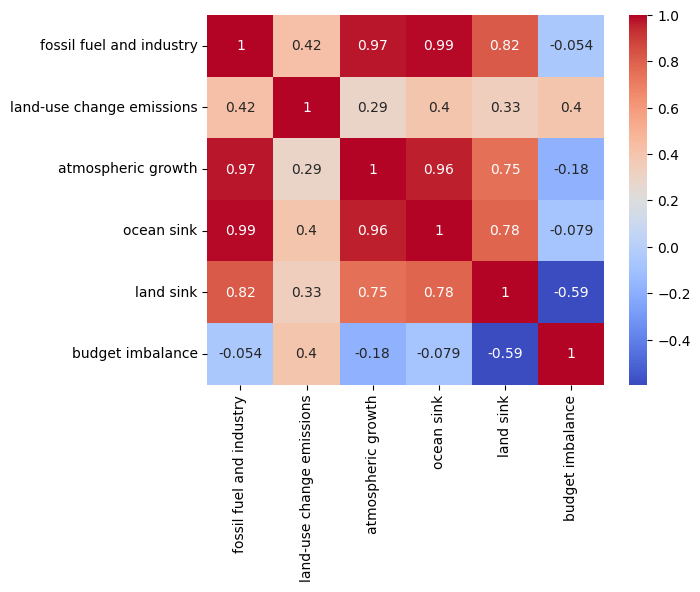

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

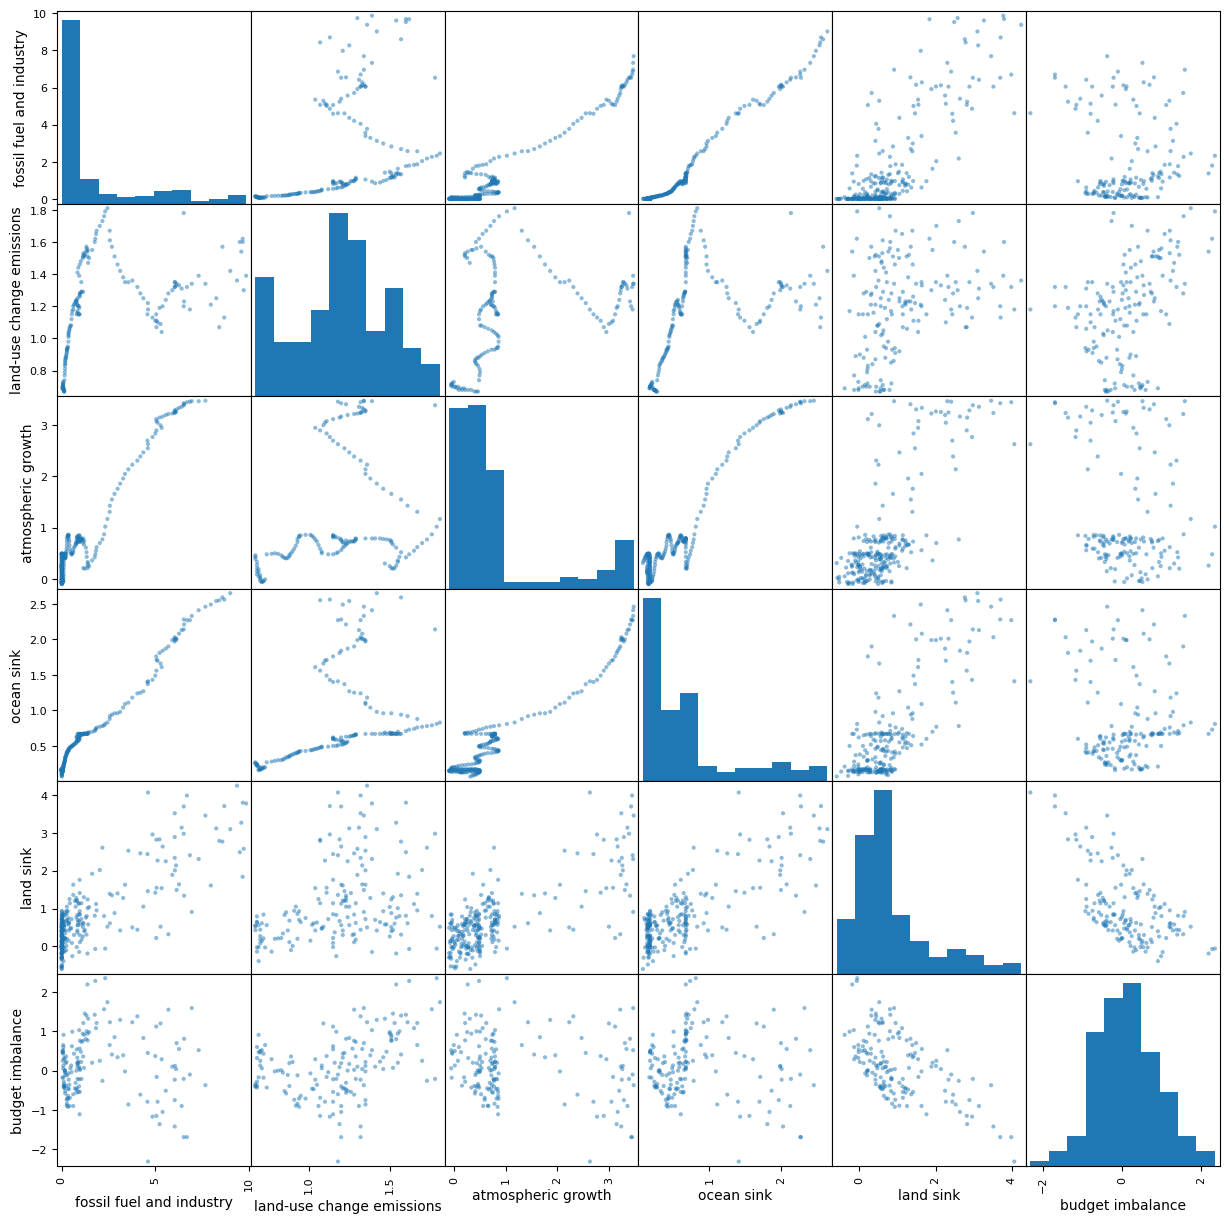

In [ ]:
# gráficos de correlación múltiple entre variables cuantitativas
pd.plotting.scatter_matrix(df,
                           figsize=(15, 15))
plt.show()

Vamos a explorar algunas relaciones entre variables

In [ ]:
# fossil vs ocean
fig = px.scatter(df,  # datos
                 x="fossil fuel and industry", # variable x
                 y="ocean sink",  #variable y
                 trendline='ols', # línea de tendencia
                 trendline_color_override='red')
fig.show()

In [ ]:
# fossil and land
fig = px.scatter(df,
                 x="fossil fuel and industry",
                 y="land sink",
                 trendline = "ols",
                 trendline_color_override = "red"
                 )
fig.show()

In [ ]:
# ocean an land
fig = px.scatter(df,
                 x="ocean sink",
                 y="atmospheric growth",
                 trendline = "ols",
                 trendline_color_override = "red")
fig.show()

Observamos que las tres variables anteriores tienen información altamente correlacionada.

## <FONT SIZE=5 COLOR="purple">  3.1 Pasos guía para trabajar PCA </FONT>

1. Cargar los datos y explorarlos

2. Estandarizar

3. Calcular vectores y valores propios con la matriz de covarianza

4. Seleccionar los componentes principales

5. Proyectar los datos en un espacio de dimensión menor o igual que 3.

**Cargar y organizar los datos**

Ya tenemos los datos. Observamos que hay datos faltantes. En este ejercicio vamos a eliminarlos. Sin embargo, esto no es recomendable y se debe examinar el motivo y naturaleza de los datos faltantes.

In [ ]:
# Debemos trabajar con datos no nulos. En esta ocasión los vamos a omitir
df2 = df.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 1850 to 2004
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fossil fuel and industry   155 non-null    float64
 1   land-use change emissions  155 non-null    float64
 2   atmospheric growth         155 non-null    float64
 3   ocean sink                 155 non-null    float64
 4   land sink                  155 non-null    float64
 5   budget imbalance           155 non-null    float64
dtypes: float64(6)
memory usage: 8.5 KB


In [ ]:
# vemos la cabeza de los datos
df2.head()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
Year,,,,,,
1850,0.05,0.69,0.19,0.16,0.56,-0.17
1851,0.05,0.69,0.13,0.17,-0.02,0.47
1852,0.06,0.70,0.07,0.17,0.27,0.25
1853,0.06,0.70,0.01,0.17,0.08,0.50
1854,0.07,0.70,-0.04,0.17,0.18,0.46


Ahora, vamos a normalizar los datos, es decir

- Resta la media
- Dividir por la desviación estandar.

In [ ]:
# datos menos al media
B = df2-df2.mean()
B.head()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
Year,,,,,,
1850,-1.949677,-0.492645,-1.014452,-0.674645,-0.448129,-0.303161
1851,-1.949677,-0.492645,-1.074452,-0.664645,-1.028129,0.336839
1852,-1.939677,-0.482645,-1.134452,-0.664645,-0.738129,0.116839
1853,-1.939677,-0.482645,-1.194452,-0.664645,-0.928129,0.366839
1854,-1.929677,-0.482645,-1.244452,-0.664645,-0.828129,0.326839


Podemos verificar que la matriz de covarianza no cambia si hacemos la translación, es deicr, cuando quitamos la media.

In [ ]:
# podemos ver la covarianza del conjunto original
df2.cov()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
fossil fuel and industry,4.784763,0.261383,2.356042,1.320437,1.463747,-0.093885
land-use change emissions,0.261383,0.087152,0.096296,0.076890,0.080228,0.095025
atmospheric growth,2.356042,0.096296,1.233748,0.655249,0.727616,-0.164199
ocean sink,1.320437,0.076890,0.655249,0.372719,0.407931,-0.038630
land sink,1.463747,0.080228,0.727616,0.407931,0.847057,-0.438732
budget imbalance,-0.093885,0.095025,-0.164199,-0.038630,-0.438732,0.642928


In [ ]:
# B es la translación de los datos para que queden centrados en cero x-media(x)
B.cov()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
fossil fuel and industry,4.784763,0.261383,2.356042,1.320437,1.463747,-0.093885
land-use change emissions,0.261383,0.087152,0.096296,0.076890,0.080228,0.095025
atmospheric growth,2.356042,0.096296,1.233748,0.655249,0.727616,-0.164199
ocean sink,1.320437,0.076890,0.655249,0.372719,0.407931,-0.038630
land sink,1.463747,0.080228,0.727616,0.407931,0.847057,-0.438732
budget imbalance,-0.093885,0.095025,-0.164199,-0.038630,-0.438732,0.642928


Ahora vamos a normalizar

In [ ]:
# vamos a normalizar los datos
df_norm = (df2 - df2.mean())/(df2.std()) ;
df_norm.head()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
Year,,,,,,
1850,-0.891318,-1.668766,-0.913310,-1.105058,-0.486908,-0.378088
1851,-0.891318,-1.668766,-0.967328,-1.088678,-1.117098,0.420088
1852,-0.886746,-1.634892,-1.021346,-1.088678,-0.802003,0.145715
1853,-0.886746,-1.634892,-1.075363,-1.088678,-1.008445,0.457503
1854,-0.882175,-1.634892,-1.120378,-1.088678,-0.899791,0.407617


Observe algo importante:

La covarianza de los datos normalizados es la correlación de los datos sin normalizar

In [ ]:
df_norm.cov()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
fossil fuel and industry,1.000000,0.404771,0.969705,0.988774,0.727075,-0.053529
land-use change emissions,0.404771,1.000000,0.293668,0.426617,0.295279,0.401439
atmospheric growth,0.969705,0.293668,1.000000,0.966279,0.711759,-0.184363
ocean sink,0.988774,0.426617,0.966279,1.000000,0.726006,-0.078913
land sink,0.727075,0.295279,0.711759,0.726006,1.000000,-0.594513
budget imbalance,-0.053529,0.401439,-0.184363,-0.078913,-0.594513,1.000000


In [ ]:
df2.corr()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
fossil fuel and industry,1.000000,0.404771,0.969705,0.988774,0.727075,-0.053529
land-use change emissions,0.404771,1.000000,0.293668,0.426617,0.295279,0.401439
atmospheric growth,0.969705,0.293668,1.000000,0.966279,0.711759,-0.184363
ocean sink,0.988774,0.426617,0.966279,1.000000,0.726006,-0.078913
land sink,0.727075,0.295279,0.711759,0.726006,1.000000,-0.594513
budget imbalance,-0.053529,0.401439,-0.184363,-0.078913,-0.594513,1.000000


In [ ]:
valores_propios, vectores_propios = np.linalg.eig(df_norm.cov())
print("Los vectores propios son \n \n " , vectores_propios , "\n")
print("Los valores propios son \n \n ", valores_propios)

Los vectores propios son 
 
  [[ 0.49949296  0.09659132  0.25021475 -0.22449964  0.77561471 -0.1630681 ]
 [ 0.23098062  0.56232404 -0.7150887   0.32870133  0.10422133 -0.01345858]
 [ 0.49192489 -0.01042547  0.32159822  0.47465676 -0.39218576 -0.52475431]
 [ 0.50104394  0.09219622  0.20972957  0.0487123  -0.21869502  0.80390792]
 [ 0.43654799 -0.29978323 -0.42907782 -0.63147814 -0.32515287 -0.17595187]
 [-0.11638497  0.75893542  0.30744276 -0.46380899 -0.2831928  -0.14364392]] 

Los valores propios son 
 
  [3.78195788e+00 1.51841036e+00 6.05757382e-01 7.71215583e-02
 5.65565797e-06 1.67471681e-02]


Observe que tenemos 6 vectores y valores propios. Si los ordenamos

In [ ]:
sorted(valores_propios, reverse= True)

[np.float64(3.7819578805023126),
 np.float64(1.51841035554061),
 np.float64(0.6057573818262302),
 np.float64(0.07712155833175491),
 np.float64(0.016747168141126194),
 np.float64(5.6556579669338616e-06)]

In [ ]:
# ordenar los valores propios
-1*np.sort(-val)

array([3.78195788e+00, 1.51841036e+00, 6.05757382e-01, 7.71215583e-02,
       1.67471681e-02, 5.65565797e-06])

## Tomar las componentes que más aportan a la varianza explicada

In [ ]:
# A partir de los autovalores, calculamos la varianza explicada

total = sum(valores_propios)
var_exp = [(i / total)*100 for i in sorted(valores_propios, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
# veamos el gráfico de los valores propios
px.bar(var_exp,
       color = valores_propios)

In [ ]:
# veamos el gráfico de la varianza explicada acumulada
px.bar(cum_var_exp,
       color = valores_propios)

**¿Qué me está diciendo esto?**

Ahora, vamos hacer completo el Análisis de Componentes Principales usando algunas librerías que facilitan el trabajo.

## <FONT SIZE=5 COLOR="purple">  3.2 PCA con librerías </FONT>

Primero, importaremos las librerías de trabajo.

In [ ]:
# importamos la librería para pca clásica
from sklearn.decomposition import PCA
# importamos el escalador estándar
from sklearn.preprocessing import StandardScaler

Recordemos que debemos escalar los datos, es decir:

$$\dfrac{X-\mu}{\sigma}$$

- PCA hace los componentes principales pero no los escala y si las variables tiene variación muy grandes esto tiene problema.

Para esto usamos el *StandarScaler()*

In [ ]:
df_std = StandardScaler().fit_transform(df2)
df_std

In [ ]:
# revisamos la matriz de correlaciones
pd.DataFrame(df_std , index = df2.index , columns = df2.columns).corr()

,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
fossil fuel and industry,1.000000,0.404771,0.969705,0.988774,0.727075,-0.053529
land-use change emissions,0.404771,1.000000,0.293668,0.426617,0.295279,0.401439
atmospheric growth,0.969705,0.293668,1.000000,0.966279,0.711759,-0.184363
ocean sink,0.988774,0.426617,0.966279,1.000000,0.726006,-0.078913
land sink,0.727075,0.295279,0.711759,0.726006,1.000000,-0.594513
budget imbalance,-0.053529,0.401439,-0.184363,-0.078913,-0.594513,1.000000


Ahora, definimos el PCA con un número de componentes dado

In [ ]:
# Definimos el objeto PCA y determinamos el número de componentes principales que deseamos.
pca = PCA(n_components=2)            # Otra opcion pca = PCA(n_components = 0.85).
pca.fit(df_std)                      # Ajuste ese PCA a los datos estandarizados.
pca_proj = pca.transform(df_std)    # calcula las nuevas variables que son combinación lineal de las originales

**pcs.transform** se usa para proyectar los datos originales en el nuevo espacio reducido por el PCA.

y las componentes son:

In [ ]:
pca.components_

array([[ 0.49949296,  0.23098062,  0.49192489,  0.50104394,  0.43654799,
        -0.11638497],
       [ 0.09659132,  0.56232404, -0.01042547,  0.09219622, -0.29978323,
         0.75893542]])

In [ ]:
  [[ 0.49949296  0.09659132  0.25021475 -0.22449964  0.77561471 -0.1630681 ]
 [ 0.23098062  0.56232404 -0.7150887   0.32870133  0.10422133 -0.01345858]
 [ 0.49192489 -0.01042547  0.32159822  0.47465676 -0.39218576 -0.52475431]
 [ 0.50104394  0.09219622  0.20972957  0.0487123  -0.21869502  0.80390792]
 [ 0.43654799 -0.29978323 -0.42907782 -0.63147814 -0.32515287 -0.17595187]
 [-0.11638497  0.75893542  0.30744276 -0.46380899 -0.2831928  -0.14364392]]

In [ ]:
proyecciones = pd.DataFrame(pca_proj,
                            columns = ['PC1', 'PC2'],
                            index   = df2.index)
proyecciones.head(10)

,PC1,PC2
Year,,
1850,-2.008667,-1.261896
1851,-2.396289,-0.462555
1852,-2.242771,-0.746110
1853,-2.396249,-0.446063
1854,-2.362762,-0.515811
1855,-2.383337,-0.424952
1856,-2.090406,-1.014900
1857,-1.925483,-1.297427
1858,-2.301427,-0.510894


Exploremos la correlación de estas dos componentes

In [ ]:
proyecciones.corr()

,PC1,PC2
PC1,1.000000e+00,-2.977042e-16
PC2,-2.977042e-16,1.000000e+00


tienen que tener correlaciones casi nulas entre las variables diferentes.

In [ ]:
# para ver la varianza explicada
pca.explained_variance_ratio_

array([0.63032631, 0.25306839])

In [ ]:
# Cantidad de varianza retenida por las 2 primeras componentes principales.
ratio = np.sum(pca.explained_variance_ratio_)
print(f"\nLa cantidad de variabilidad retenida por las 2 primeras componentes es {ratio*100:.3f}%")


La cantidad de variabilidad retenida por las 2 primeras componentes es 88.339%


Veamos un mapa de calor para ver la relación entre las variables y PCA

In [ ]:
pca.components_

array([[ 0.49949296,  0.23098062,  0.49192489,  0.50104394,  0.43654799,
        -0.11638497],
       [ 0.09659132,  0.56232404, -0.01042547,  0.09219622, -0.29978323,
         0.75893542]])

<Axes: >

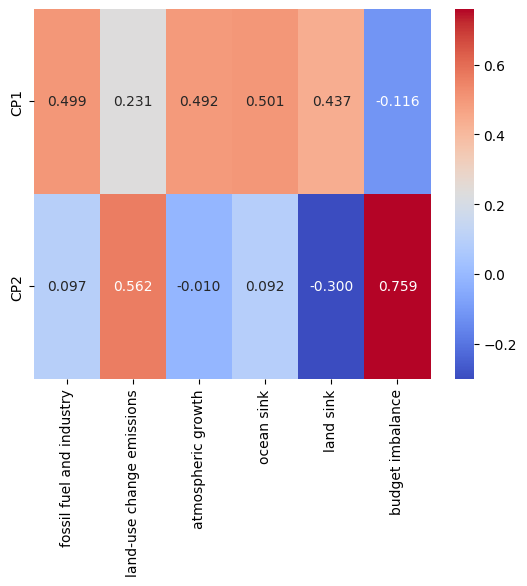

In [ ]:
sns.heatmap(pca.components_,                             # las componentes del PCA
            xticklabels=df2.columns,                     # en x van las columnas del dataframe original
            yticklabels=["CP1", "CP2"],                  # en y van las componentes CP1 y CP2
            cmap = "coolwarm",                           # mapa de calor
            fmt=".3f",                                   # formato de los valores
            annot=True)                                  # para que muestre valores

Lo que significa que:

$$PC1 = 0.49(fossil) + 0.23(land) + 0.49(atmosphere) + 0.5(ocean) + 0.44 (land sink) -0.12(budget) $$

de manera similar para PC2

Observe que el mayor peso lo tienen

PC1 :*fossil* y *atmosphere* y *ocean*

PC2 : *budget* y *land*

Veamos gráficamente en este caso dos *dimensiones*

In [ ]:
fig=px.scatter(proyecciones,
               x="PC1",
               y="PC2",
               hover_name=proyecciones.index,
               text=proyecciones.index)
fig.show()

**Hagamos el mismo ejercicio con tres componentes**

In [ ]:
# Definimos el objeto PCA y determinamos el número de componentes principales que deseamos.
pca3 = PCA(n_components=3)               # Otra opcion pca = PCA(n_components = 0.85).
pca3.fit(df_std)                          # Ajuste ese PCA a los datos estandarizados.
pca3_proj = pca3.transform(df_std)       # calcula las nuevas variables que son combinación lineal de las originales

In [ ]:
proyecciones3 = pd.DataFrame(pca3.transform(df_std),
                             columns = ["PC1", "PC2","PC3"],
                             index   = df2.index
)
proyecciones3.head(10)

,PC1,PC2,PC3
Year,,,
1850,-2.008667,-1.261896,-0.539236
1851,-2.396289,-0.462555,-1.042720
1852,-2.242771,-0.746110,-0.781872
1853,-2.396249,-0.446063,-0.949478
1854,-2.362762,-0.515811,-0.873943
1855,-2.383337,-0.424952,-0.889068
1856,-2.090406,-1.014900,-0.493439
1857,-1.925483,-1.297427,-0.275593
1858,-2.301427,-0.510894,-0.811256


------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.63032631 0.88339471 0.98435427]


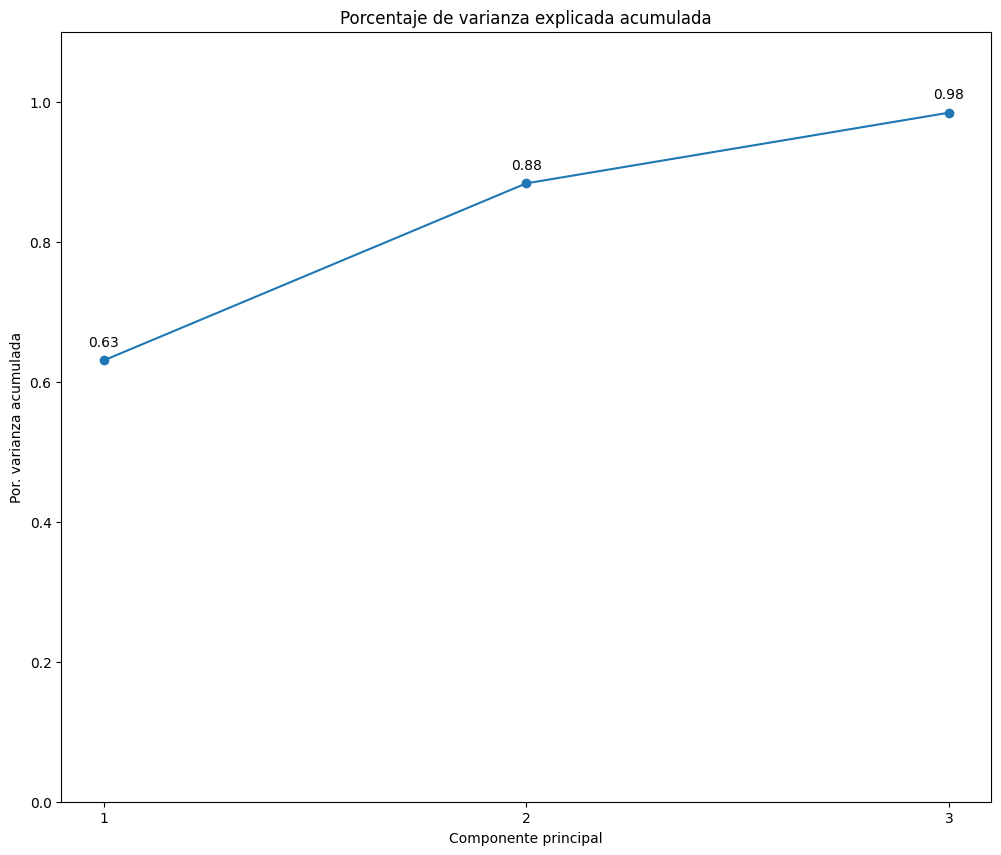

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca3.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.plot(
    np.arange(len(proyecciones3.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(proyecciones3.columns)) + 1, prop_varianza_acum): # hacer las proyecciones
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca3.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

También podemos gráficar los puntos en el espacio

In [ ]:
fig = px.scatter_3d(proyecciones3,
                    x="PC1",
                    y= "PC2",
                    z= "PC3",
                   hover_name= df2.index,
                   text=df2.index,
                   labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

A continuación, revisaremos una repreentación gráfica útil en el análisis de componentes principales

## <FONT SIZE=5 COLOR="purple">  3.3 Biplots </FONT>

Un biplot es una herramienta visual muy útil cuando se hace un Análisis de Componentes Principales (PCA), ya que permite visualizar:

  - Los individuos/observaciones (como puntos)

  - Las variables originales (como flechas)

Para los vectores (variables), nos fijamos en su longitud y en el ángulo con respecto a los ejes de las componentes principales y entre ellos mismos:

**Ángulo**:

- Cuanto más paralelo es un vector al eje de una componente, más ha contribuido a la creación de la misma. Con ello se obtiene información sobre qué variable(s) ha sido más determinante para crear cada componente, y si entre las variables (y cuales) hay correlaciones.

- Ángulos pequeños entre vectores representa alta correlación entre las variables implicadas (observaciones con valores altos en una de esas variables tendrá valores altos en la variable o variables correlacionadas)

- Ángulos rectos representan falta de correlación, y ángulos opuestos representan correlación negativa (una observación con valores altos en una de las variables irá acompañado de valores bajos en la otra).

**Longitud**: cuanto mayor la longitud de un vector relacionado con x variable (en un rango normalizado de 0 a 1), mayor variabilidad de dicha variable está contenida en la representación de las dos componentes del biplot, es decir, mejor está representada su información en el gráfico.

Vamos a ver los pasos para gráficar un Biplot

In [ ]:
!pip install pca

In [ ]:
from pca import pca

In [ ]:
model = pca(n_components=2, normalize=True)
out = model.fit_transform(df2)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


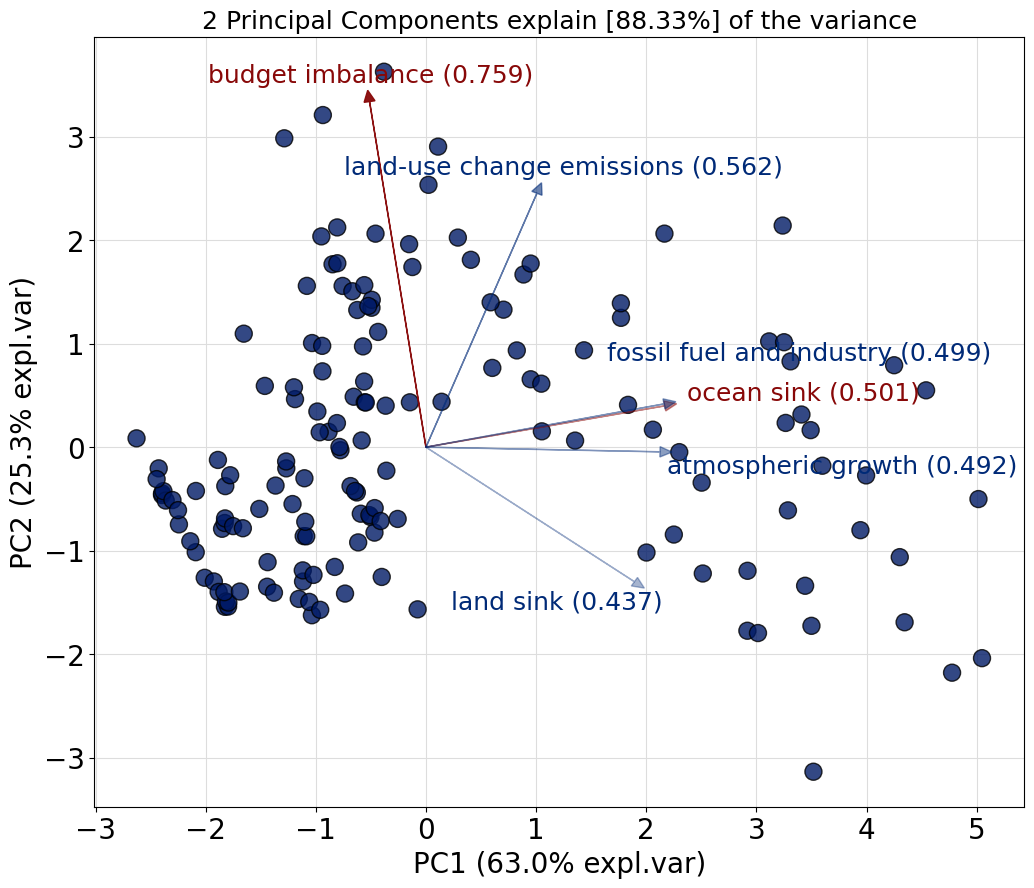

In [ ]:
# para hacer el biplot
fig, ax = model.biplot(label=True,
                       legend=True,
                       figsize=(12, 10))

Interpretación:

1. **Observaciones (puntos)**

- Cada punto representa un individuo (una fila de tu dataset original):

- Puntos cercanos: tienen valores similares en las variables originales.

- Puntos lejanos: son más distintos.

2. **Variables (flechas)**

 Las flechas representan las variables originales proyectadas en el nuevo espacio de componentes.

**Dirección**

 - Las variables que apuntan en la misma dirección están positivamente correlacionadas.

 - Si apuntan en direcciones opuestas → correlación negativa.

 - Si son casi perpendiculares → poca o ninguna correlación.

**Longitud de la flecha:**

 - Cuanto más larga, más importancia (mayor contribución a esas componentes).

 - Flechas cortas → variable menos explicada por las componentes mostradas.

**Ángulo entre flechas y ejes:**

 - Si una flecha apunta casi en la misma dirección que el eje PC1, esa variable tiene mucha carga (loading) en PC1.


PC1 explica el 63.0% de la varianza total.

PC2 explica el 25.3% de la varianza.

En conjunto, estas dos componentes explican el 88.33%, lo cual es excelente, ya que la mayoría de la información original está conservada.

** budget imbalance (0.759)**

- Mayor contribuyente a PC2, con una flecha larga y apuntando hacia arriba.

- Esta variable está menos correlacionada con otras (ángulo grande respecto a la mayoría).

- Su valor 0.759 indica que tiene alta carga en esa dirección.

- Las observaciones hacia la parte superior del gráfico tienen mayor desequilibrio presupuestario de carbono.

**land-use change emissions (0.562)**

- Apunta hacia la parte superior derecha.

- Tiene una buena contribución tanto a PC1 como a PC2.

- Probablemente relacionada positivamente con otras variables que apuntan en esa dirección.

**fossil fuel and industry (0.499)**

- Aporta mucho a PC1.

- Similar dirección a ocean sink y atmospheric growth, lo que sugiere correlación positiva entre esas tres variables.

**ocean sink (0.501)**

- Similar en dirección a fossil fuel and industry y atmospheric growth, lo que puede parecer contraintuitivo (porque el sumidero debería "compensar"), pero esto solo indica que estos valores aumentan juntos en los datos, no necesariamente causalidad positiva.

**atmospheric growth (0.492)**

- Contribuye fuertemente a PC1.

- Correlacionada con fossil fuel, ocean sink.

**land sink (0.437)**

- Apunta hacia abajo a la derecha.

- Menor influencia que las otras variables, pero aún significativa.

***En resumen***

- PC1 (63%) parece estar muy influido por emisiones fósiles, atmósfera, océano, y en menor medida por land sink.

- PC2 (25%) está dominado por el budget imbalance.

- Las observaciones hacia la derecha del gráfico son las que presentan valores más altos en emisiones fósiles, crecimiento atmosférico y sumideros oceánicos.

- Las observaciones más arriba tienen mayor desequilibrio en el presupuesto de carbono.


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


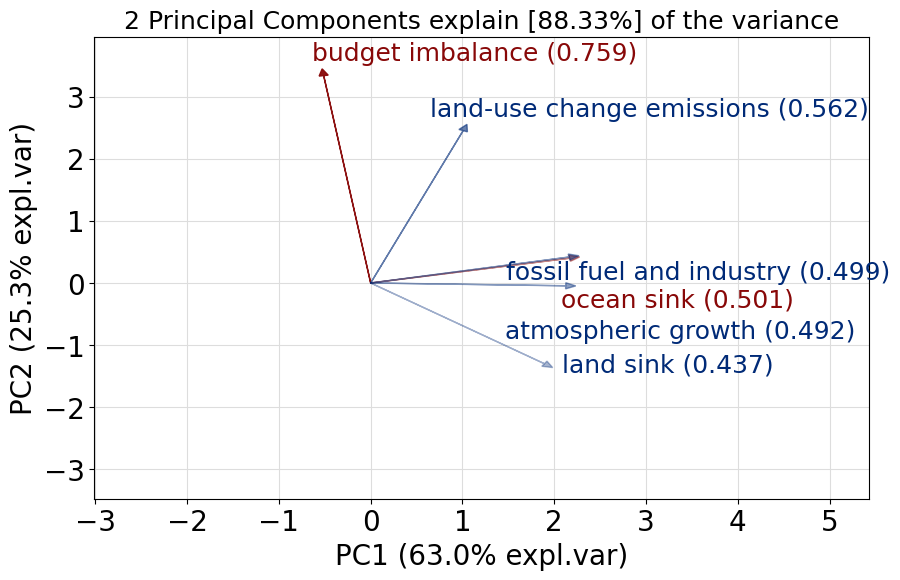

In [ ]:
# Si no queremos agregar los puntos
fig, ax = model.biplot(cmap=None,
                       label=False,
                       legend=False,
                       figsize=(10, 6))

# <FONT SIZE=5 COLOR="purple">  4. Ejemplo 2. Aplicado PCA + K-means </FONT>

Consideremos el conjunto de datos clásico de mnist de la librería keras. Este conjunto se usa mucho para redes neuronales y en internet hay muchos ejemplos con este conjunto.


Vamos a importar las librerías

In [ ]:
# importamos keras para el conjunto de datos
import keras
from keras.datasets import fashion_mnist
# importamos kmeans
from sklearn.cluster import KMeans

El conjunto de datos que vamos a usar, viene distribuido en dos partes ya que nos sirve para problemas de clasificación.

In [ ]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

Para el propósito de este ejercicio solamente vamos a tomar el conjunto de entrenamiento.


In [ ]:
# debemos redimensionar los datos. como es 28 x 28 = 784
imagenes = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
imagenes.shape

(60000, 784)

In [ ]:
# llamaremos y a los labels
y = y_train
y.shape

(60000,)

La variable y está dada de forma numérica, pero en realidad es una codificación de lo siguiente:

0 --->  Tshirt

1 --->  Trouser

2 --->  Pullover

3 --->  Dress

4 --->  Coat

5 --->  Sandal

6 --->  Shirt

7 --->  Sneaker

8 --->  Bag

9 --->  Ankle Boot

Visualicemos algunos elementos

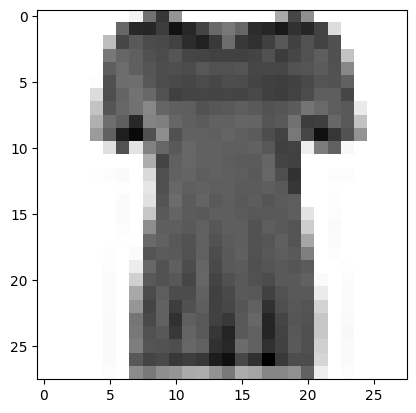

np.uint8(0)

In [ ]:
# podemos cambiar el número n
n= 10
plt.imshow(imagenes[n].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary)
plt.show()
y[n]

La idea del ejercicio es reducir la dimensionalidad para luego aplicar k-means y hacer el proceso de clustering

## <FONT SIZE=5 COLOR="purple">  4.1 Aplicar PCA </FONT>

In [ ]:
# primero debeos escalar los datos
imagenes_est = StandardScaler().fit_transform(imagenes)

In [ ]:
from sklearn.decomposition import PCA
#vamos a definir la varianza que queremos acumular
varianza = 0.98
pca = PCA(varianza)

In [ ]:
#entreno el PCA
pca.fit(imagenes_est)

PCA(n_components=0.98)

Veamos el número de componentes

In [ ]:
pca.n_components_

np.int64(420)

Ahora, vamos a transformar nuestros datos

In [ ]:
#Transform our data according to our PCA instance
imagenes_pca = pca.transform(imagenes_est)

In [ ]:
# dimensión después del PCA
imagenes_pca.shape

(60000, 420)

In [ ]:
#Vamos a definir la transformada inversa para poder visualizar los elementos a partir de la transformación
approx = pca.inverse_transform(imagenes_pca)
approx.shape


(60000, 784)

Vamos a reconstruir las imágenes usando menos información

8


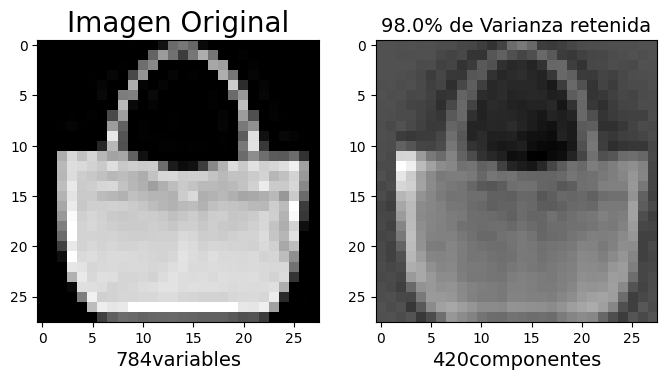

In [ ]:
#Reconstrucción de las imágenes con menos información
plt.figure(figsize=(8,4));

# un valor de n para el objeto del dataframe
n = 100

# Imagen Original
plt.subplot(1, 2, 1);
plt.imshow(imagenes[n].reshape(X_train.shape[1],X_train.shape[2]),
           cmap = plt.cm.gray,);
plt.xlabel(str(imagenes.shape[1])+'variables', fontsize = 14)
plt.title('Imagen Original', fontsize = 20);

# Imagen con las componentes
plt.subplot(1, 2, 2);
plt.imshow(approx[n].reshape(X_train.shape[1], X_train.shape[2]),
           cmap = plt.cm.gray,);
plt.xlabel(str(imagenes_pca.shape[1]) +"componentes", fontsize = 14)
plt.title(str(varianza * 100) + '% de Varianza retenida', fontsize = 14);

print(y_train[n])

## <FONT SIZE=5 COLOR="purple">  4.2 Aplicar K-means </FONT>


In [ ]:
k_means = KMeans(init = "k-means++",
                 n_clusters = 10,
                 n_init = 35)

**init="k-means++"**

- Utiliza el algoritmo KMeans++ para elegir los centroides iniciales de forma inteligente.

- Mejora la estabilidad del algoritmo y reduce el riesgo de caer en un mal mínimo local.

Es mejor que usar centroides aleatorios (init="random").

**n_clusters=10**

- Es el número de grupos y tomaremos 10 por las clases que hay en el conjunto.

**n_init=35**

- Significa que el algoritmo KMeans se ejecutará 35 veces con diferentes centroides iniciales.

- Luego elegirá la mejor solución (la que tenga el menor error de agrupamiento, o inercia).

- Más repeticiones = más probabilidades de encontrar una buena solución.

In [ ]:
#vamos a entrenar el modelo de kmeans para nuestros datos_pca
k_means.fit(imagenes_pca)

KMeans(n_clusters=10, n_init=35)

In [ ]:
# verificamos los labels o etiquetas
k_means_labels = k_means.labels_
print("La lista de los labels de los clusters son " + str(np.unique(k_means_labels)))

La lista de los labels de los clusters son [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# número de labels
num_lab = len(np.unique(k_means_labels))

#Veamos los elementos que pertenecen a cada label o etiqueta
cluster_index= [[] for i in range(num_lab)]
for i, label in enumerate(k_means_labels,0):
    for n in range(num_lab):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue

In [ ]:
# veamos los primeros 10 indices algunos label
print("registros del label 0", cluster_index[0][0:10])
print("registros del label 1", cluster_index[1][0:10])
print("registros del label 2", cluster_index[2][0:10])

registros del label 0 [5, 7, 18, 24, 27, 29, 32, 39, 40, 45]
registros del label 1 [23, 105, 109, 110, 130, 144, 152, 161, 165, 168]
registros del label 2 [3, 22, 28, 35, 36, 37, 54, 57, 61, 72]


Ahora, vamos a visualizar algunos clusters

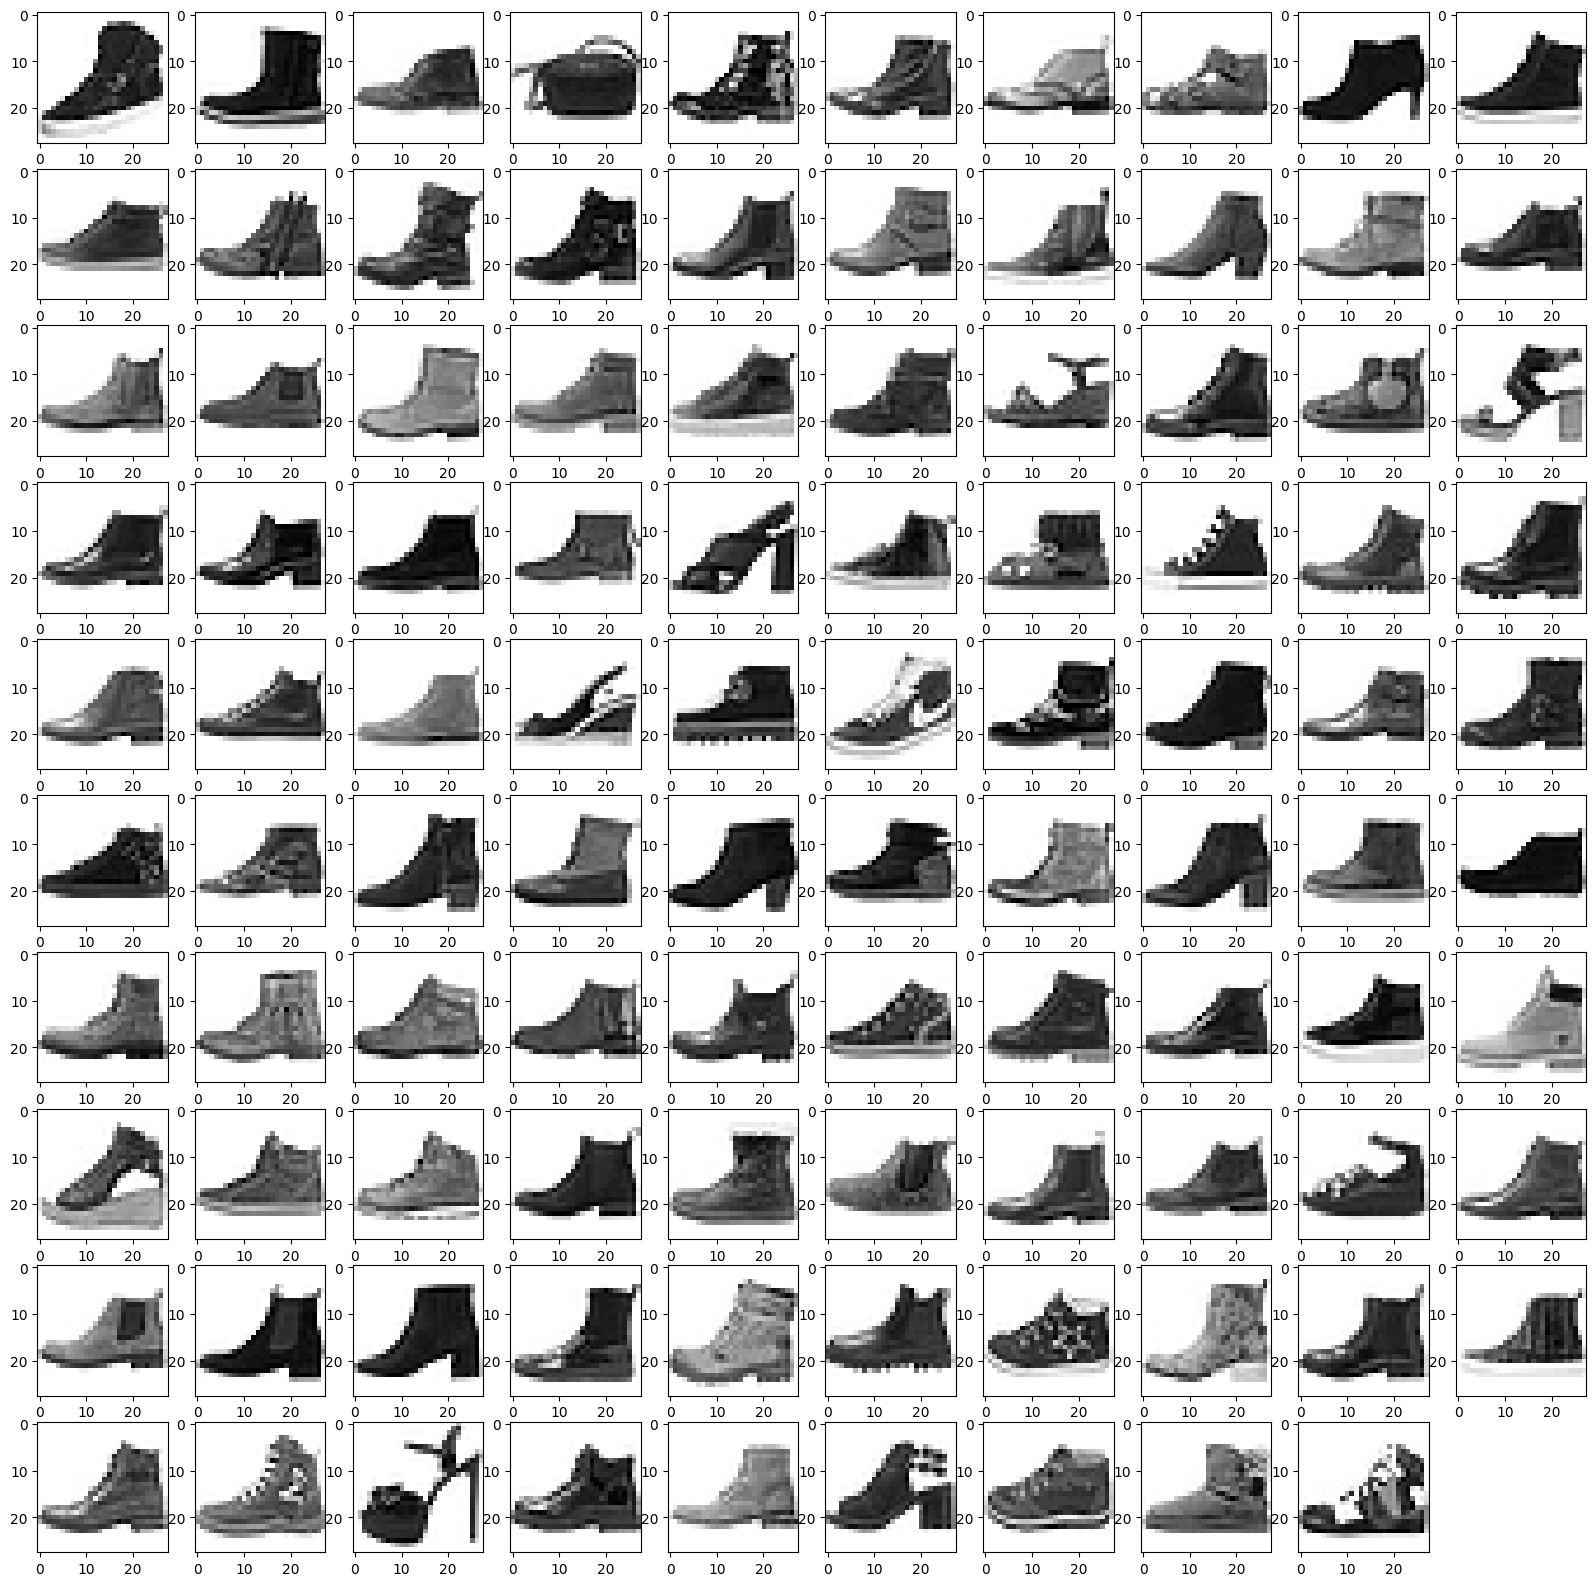

In [ ]:
#Visualización de algunos clusters
# establecemos el tamaño de la figura
plt.figure(figsize=(20,20));
# definimos el número de cluster que queremos visualizar
clust = 8
# definimos el número de elementos a visualizar
num = 100
for i in range(1,num):
    # número de filas, número de columnas por filas, iterador
    plt.subplot(10, 10, i);
    plt.imshow(imagenes[cluster_index[clust][i+500]].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary);

plt.show()

In [ ]:
Y_clust = [[] for i in range(num_lab)]
for n in range(num_lab):
    # Y_clust[0] contiene el arreglo de la categoria correcta de y_train
    Y_clust[n] = y[cluster_index[n]]
    assert(len(Y_clust[n]) == len(cluster_index[n]))

In [ ]:
#cuenta el número de cada categoria en cada cluster
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index

In [ ]:
label_count= [[] for i in range(num_lab)]
for n in range(num_lab):
    label_count[n] = counter(Y_clust[n])
# número de items de cada categoría enel cluster 1.
label_count[1]

{np.uint8(0): np.int64(47),
 np.uint8(1): np.int64(5),
 np.uint8(2): np.int64(26),
 np.uint8(4): np.int64(5),
 np.uint8(6): np.int64(81),
 np.uint8(8): np.int64(2125)}

In [ ]:
# diccionario con los nombres de las clases
class_names = {0:'T-shirt/top',
               1:'Trouser',
               2:'Pullover',
               3:'Dress',
               4:'Coat',
               5:'Sandal',
               6:'Shirt',
               7:'Sneaker',
               8:'Bag',
               9:'Ankle boot'}

# definimos una función para que me represente gráficamente las frecuencias
def plotter(label_dict):
    plt.bar(range(len(label_dict)), list(label_dict.values()), align='center')
    a = []
    for i in [*label_dict]: a.append(class_names[i])
    plt.xticks(range(len(label_dict)), list(a), rotation=45, rotation_mode='anchor')

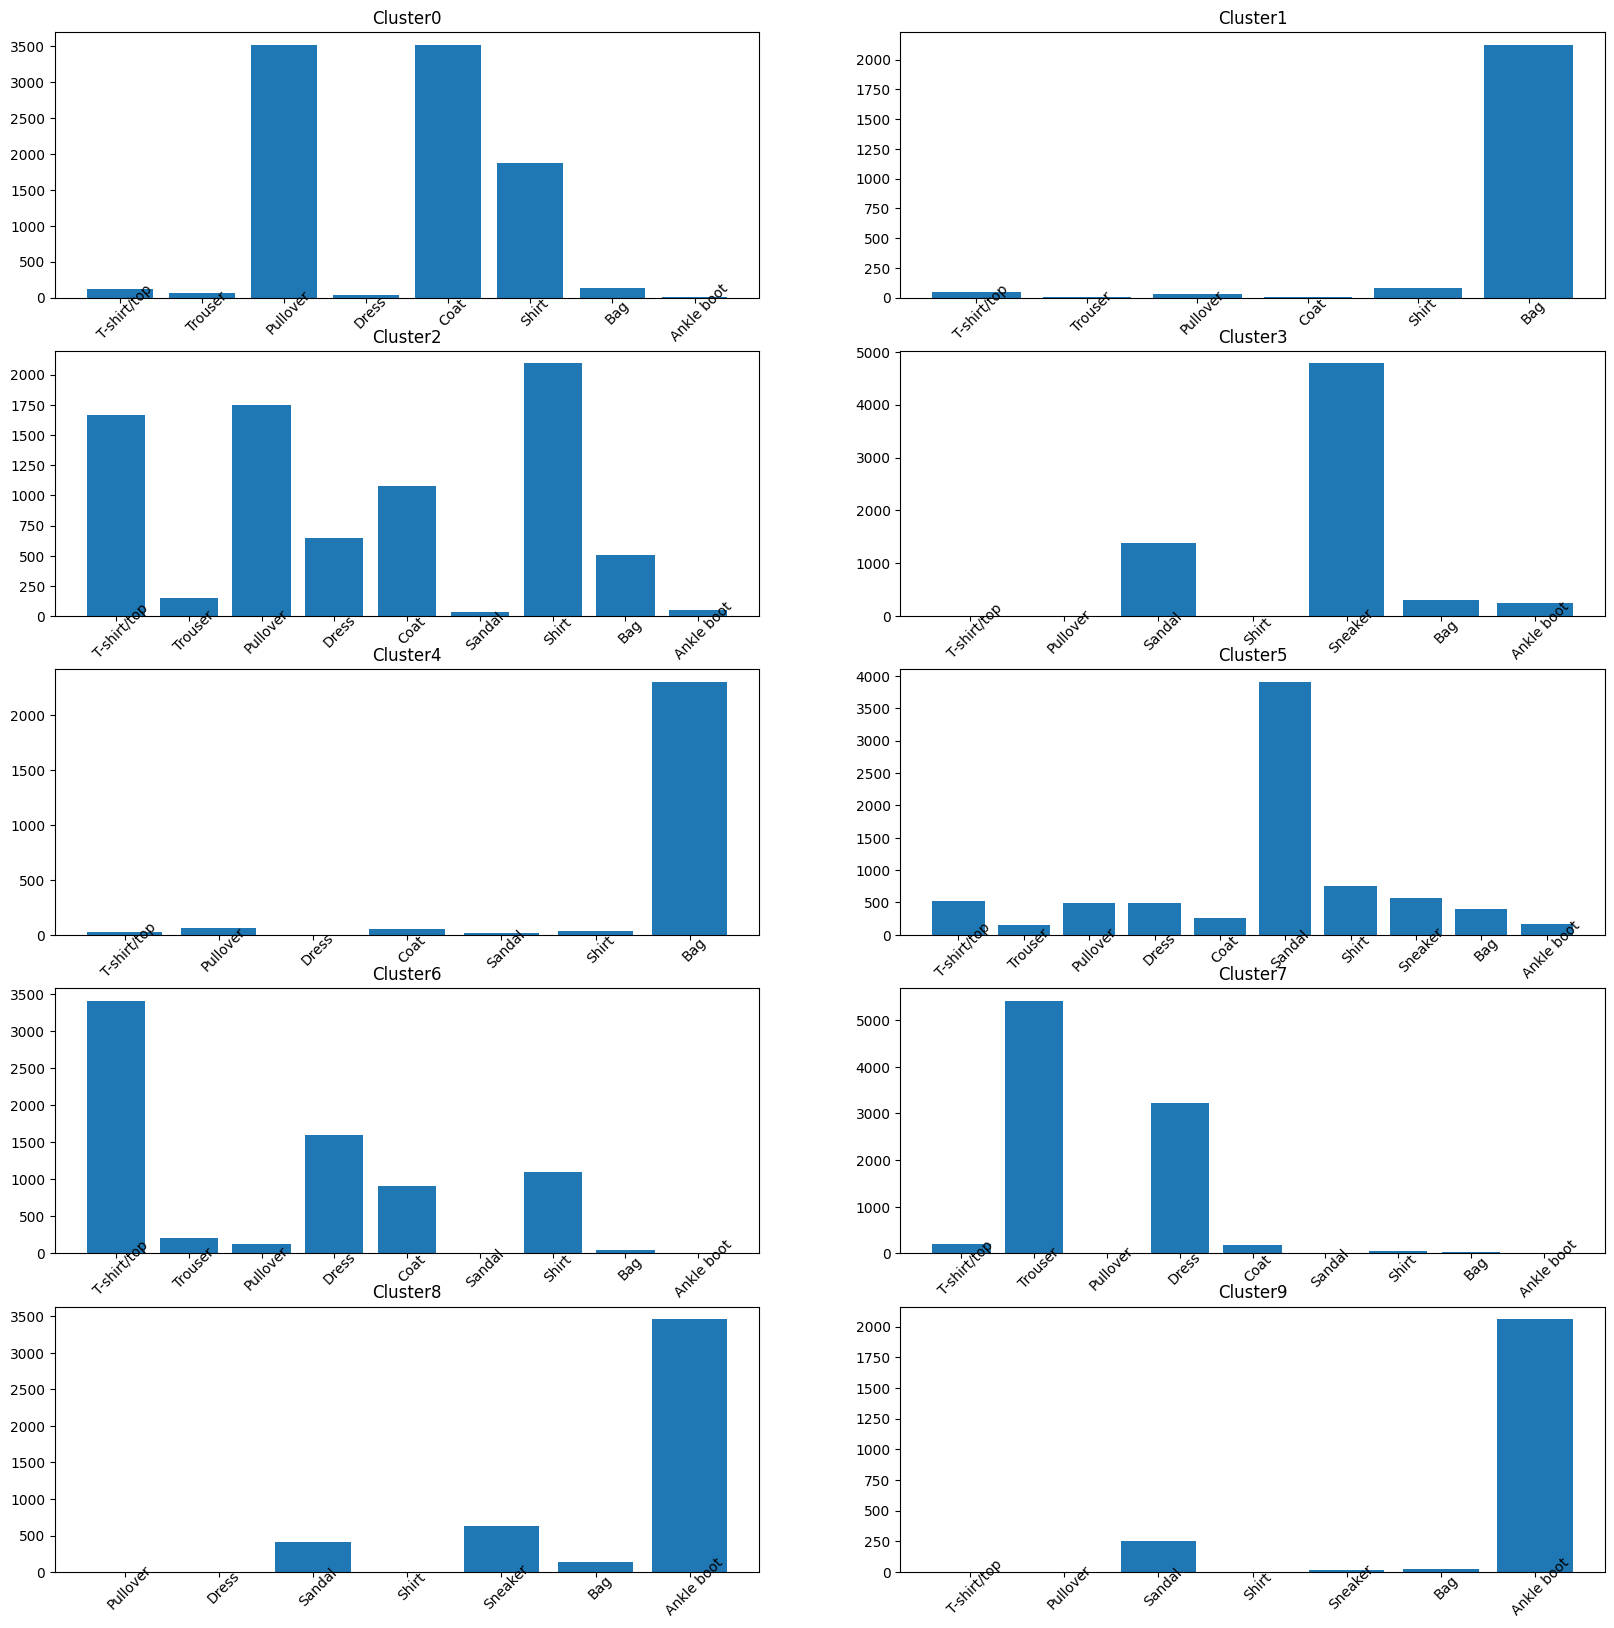

In [ ]:
# veamos las gráficas
plt.figure(figsize=(20,20))
for i in range (1,11):
    plt.subplot(5, 2, i)
    plotter(label_count[i-1])
    plt.title("Cluster" + str(i-1))

Podemos hacer una visualización

In [ ]:
# centroides
k_means_cluster_centers = k_means.cluster_centers_
# tamaño de los centroides
k_means_cluster_centers.shape

(10, 420)

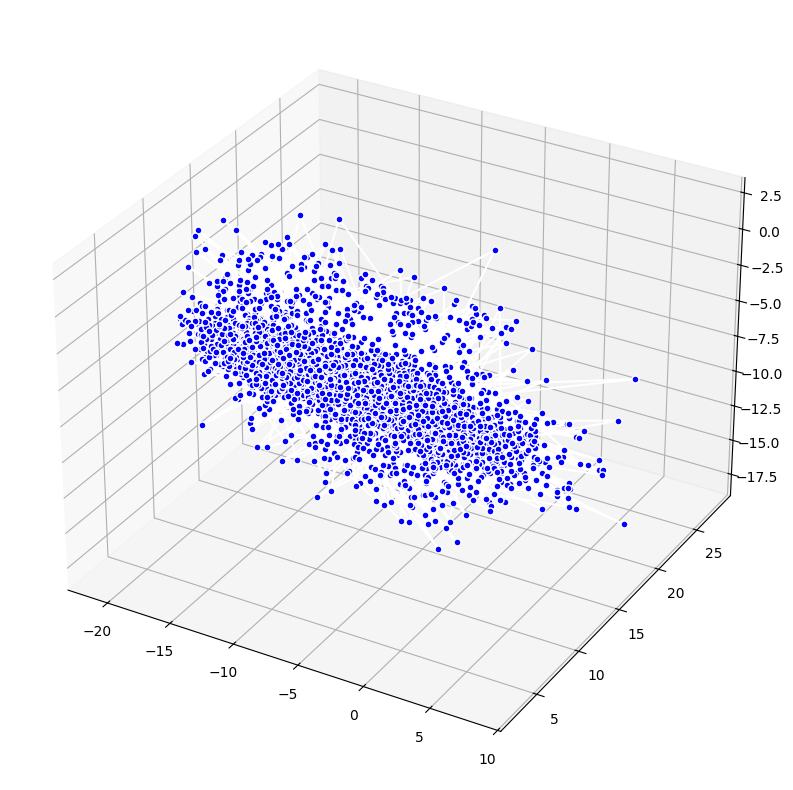

In [ ]:
#Podemos definir diferentes clusters para ver la gráfica
my_members = (k_means_labels == 8)
my_members.shape
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1,projection='3d')
#Clus_dataSet.shape
#Clus_dataSet[my_members,300].shape
ax.plot(imagenes_pca[my_members,0],
        imagenes_pca[my_members,1],
        imagenes_pca[my_members,2],
        'w',
        markerfacecolor="blue",
        marker='.',markersize=10)

# <FONT SIZE=5 COLOR="purple">  5. Otros ejemplos </FONT>

Para este ejemplo consideraremos los delitos en Colombia del año 2017

In [1]:
import pandas as pd

In [2]:
delitos=pd.read_csv("https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Delitos_Colombia.csv", sep=";", decimal=",", index_col=0)


In [3]:
delitos.head()

,Delitos_Sexuales,Homicidios,Transito,Asalto,Intrafamiliar,Poblacion
Departamento,,,,,,
Antioquia,2163,375,5079,11897,8205,6690977
Atlantico,1042,85,1928,59,3659,2546138
Bogota_D.C.,4211,1463,725,2725,19811,8181047
Bolivar,944,28,922,3812,2085,2171558
Boyaca,517,95,1167,4084,2707,1281979


In [ ]:
delitos.dtypes

,0
Delitos_Sexuales,int64
Homicidios,int64
Transito,int64
Asalto,int64
Intrafamiliar,int64
Poblacion,int64


In [ ]:
delitos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Antioquia to Vichada
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Delitos_Sexuales  33 non-null     int64
 1   Homicidios        33 non-null     int64
 2   Transito          33 non-null     int64
 3   Asalto            33 non-null     int64
 4   Intrafamiliar     33 non-null     int64
 5   Poblacion         33 non-null     int64
dtypes: int64(6)
memory usage: 2.9+ KB


In [ ]:
delitos = delitos.dropna()
delitos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Antioquia to Vichada
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Delitos_Sexuales  33 non-null     int64
 1   Homicidios        33 non-null     int64
 2   Transito          33 non-null     int64
 3   Asalto            33 non-null     int64
 4   Intrafamiliar     33 non-null     int64
 5   Poblacion         33 non-null     int64
dtypes: int64(6)
memory usage: 2.9+ KB


In [ ]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal
from sklearn.preprocessing import StandardScaler
delitos_std = StandardScaler().fit_transform(delitos)

In [ ]:
# Instanciamos un objeto PCA y determinamos el número de componentes principales que deseamos.
pca3 = PCA(n_components=2)           # Otra opcion pca = PCA(n_components = 0.85).
pca3.fit(delitos_std)                   # Ajuste ese PCA a los datos estandarizados.
pca3_array = pca3.transform(delitos_std)

In [ ]:
pca3.explained_variance_

array([4.52067981, 1.39761415])

In [ ]:
## Cantidad de varianza retenida por las 2 primeras componentes principales.
ratio = np.sum(pca3.explained_variance_ratio_)
print(f"\nLa cantidad de variabilidad retenida por las 2 primeras componentes es {ratio*100:.3f}%")


La cantidad de variabilidad retenida por las 2 primeras componentes es 95.649%


In [ ]:
pca3.components_

array([[ 0.46593695,  0.4194146 ,  0.31571824,  0.32905421,  0.42327209,
         0.46891387],
       [-0.13837414, -0.37158066,  0.60945218,  0.58090512, -0.36546543,
        -0.01824034]])

<Axes: >

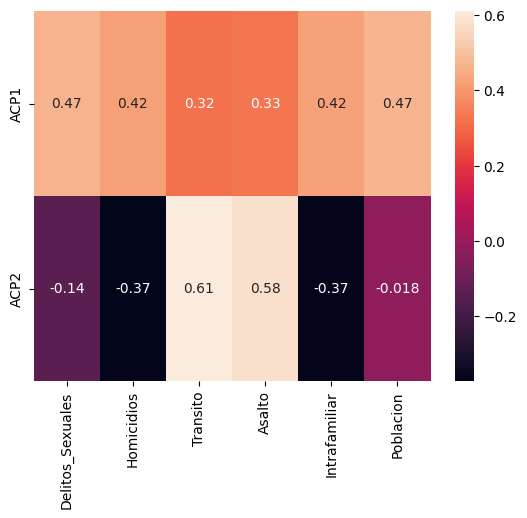

In [ ]:
ACP=[]
for i in range(0, len(pca3.components_)):
  x=["ACP", str(i+1)]
  a="".join(x)
  ACP.append(a)
sns.heatmap(pca3.components_,xticklabels=delitos.columns, yticklabels=ACP, annot=True)

In [ ]:
from pca import pca
model_delitos = pca(n_components=2, normalize=True)

ModuleNotFoundError: No module named 'pca'

In [ ]:
# Fit transform
out = model_delitos.fit_transform(Datos)

In [ ]:
# Make plot with only the directions (no scatter)
fig, ax = model_delitos.biplot(label=True,
                        legend=False,
                        figsize=(10, 10))

In [ ]:
# Instanciamos un objeto PCA y determinamos el número de componentes principales que deseamos.
Datos_std = StandardScaler().fit_transform(delitos)
pca4 = PCA(n_components=3)           # Otra opcion pca = PCA(n_components = 0.85).
pca4.fit(Datos_std)                   # Ajuste ese PCA a los datos estandarizados.
pca4_array = pca4.transform(Datos_std)

In [ ]:
np.cumsum(pca4.explained_variance_ratio_)

In [ ]:
pca4.explained_variance_

In [ ]:
cargas = pca4.components_.T * np.sqrt(pca4.explained_variance_)
variables=Datos.columns
depto_var=pd.concat([pd.DataFrame(cargas, index=Datos.columns), pd.DataFrame(Datos_std, index=Datos.index)])
fig = px.scatter_3d(depto_var, x=0, y=1, z=2, hover_name=depto_var.index, text=depto_var.index, labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

Ejercicios en Clase